In [318]:
# Import the visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

#Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#Classifier Librabries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings('ignore')


In [247]:
df = pd.read_csv('bank.csv')
df.head()  #First 5 rows of the dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [248]:
# Investigate the dataset for missing data and to know the the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [249]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [250]:
# Dimensionality of the dataset: (Rows, Columns)
df.shape

(45211, 17)

In [251]:
#Features of the dataset or Columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [252]:
# Numerical Statistical Analysis of the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [253]:
# Categorical Statistical Analysis of the dataset
df.describe(include=['object', 'bool'])

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [254]:
# Grouping the age into different age brackets
def age_group(x):
    if x <= 35:
        return '18-35 Youth'
    elif x <= 55:
        return '36-55 Adults'
    elif x <= 65:
        return '56-65 Old Adults'
    else:
        return '>=66 Elderly'
        
df['age_group'] = df['age'].apply(age_group)
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,56-65 Old Adults
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-55 Adults
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,18-35 Youth
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,36-55 Adults
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,18-35 Youth
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,18-35 Youth
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,18-35 Youth
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,36-55 Adults
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,56-65 Old Adults
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,36-55 Adults


### Exploratory Data Analysis

- Univariate Analysis


36-55 Adults        23404
18-35 Youth         16907
56-65 Old Adults     4149
>=66 Elderly          751
Name: age_group, dtype: int64


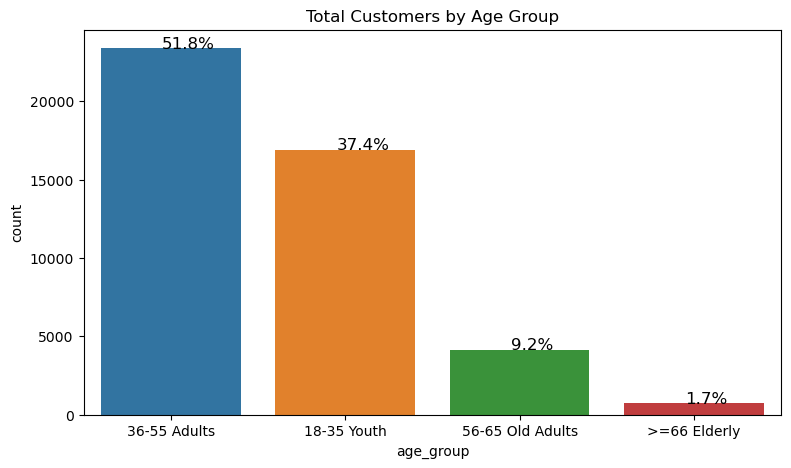

In [255]:
# Total Customers by Age Group
plt.figure(figsize=(9,5))
ag = sns.countplot(x=df['age_group'], order=df['age_group'].value_counts(ascending=False).index)
ag.set_title('Total Customers by Age Group')
n = len(df)
for p in ag.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ag.annotate(percentage, (x, y), size=12)


print(df['age_group'].value_counts().head());

#### Observation
- Majority of the customers are between the ages of 36-55 which is 51.8%
- 37.4% of the customers are between the ages of 18-35
- 9.2% of the customers are between the ages of 56-65, and the ages above 66 years are the least with 1.7%

blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
Name: job, dtype: int64


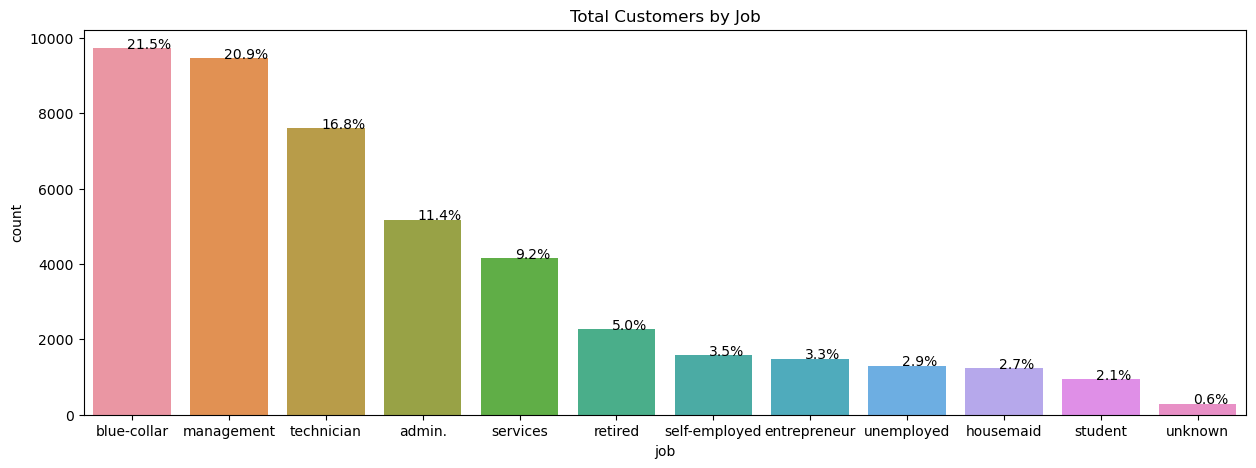

In [129]:
#Total Number of Customers by job
plt.figure(figsize=(15,5))
jc = sns.countplot(x='job', data=df, order=df['job'].value_counts(ascending=False).index)
jc.set_title('Total Customers by Job')
for p in jc.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    jc.annotate(percentage, (x, y), size=10)


print(df['job'].value_counts().head());

#### Observation
- Customers with Blue-collar job are the highest with 21.5%, follow by Management with 20.9%, customers with Technician, Admin and Services jobs are 16.8%, 11.4% and 9.2% respectively.
- Customers with unknown jobs are the least in the dataset with 0.6%

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


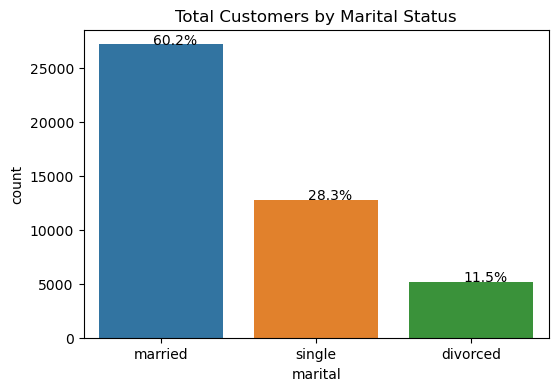

In [130]:
plt.figure(figsize=(6, 4))
mc = sns.countplot(x=df['marital'], data=df, order=df['marital'].value_counts(ascending=False).index)
mc.set_title('Total Customers by Marital Status')
for p in mc.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    mc.annotate(percentage, (x, y), size=10)


print(df['marital'].value_counts().head());

#### Observation
- Married customers in our dataset are the highest with 60.2%
- Single and Divorced customers are 28.3% and 11.5% respectively

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


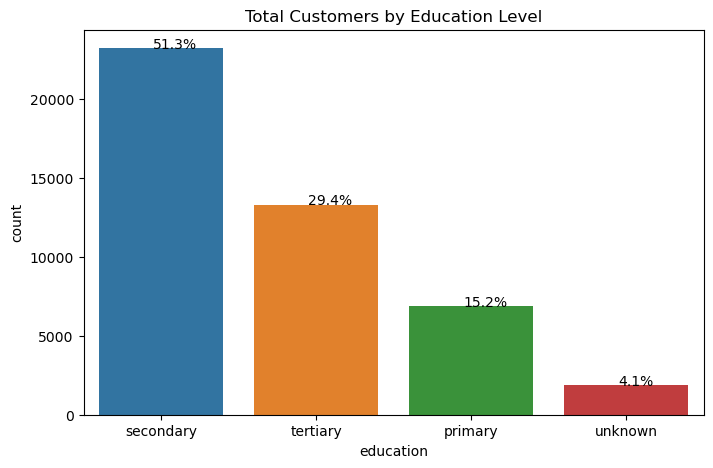

In [131]:
plt.figure(figsize=(8, 5))
ec = sns.countplot(x=df['education'], data=df, order=df['education'].value_counts(ascending=False).index)
ec.set_title('Total Customers by Education Level')
for p in ec.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ec.annotate(percentage, (x, y), size=10)


print(df['education'].value_counts());

#### Observation
- Customer with Secondary education level are the largest with 51.3%, followed by Tertiary with 29.4%
- Primary and Unknown are the least with 15.2% and 4.1% respectively

no     44396
yes      815
Name: default, dtype: int64


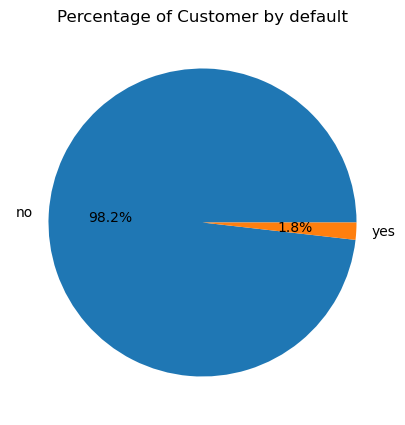

In [14]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['default'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.1f}%')
print(df['default'].value_counts())
ax.set_title('Percentage of Customer by default')
plt.show();

#### Observation
- 98.2% of the customers did not default their loans
- 1.8% of the customers defaulted their loans

yes    25130
no     20081
Name: housing, dtype: int64


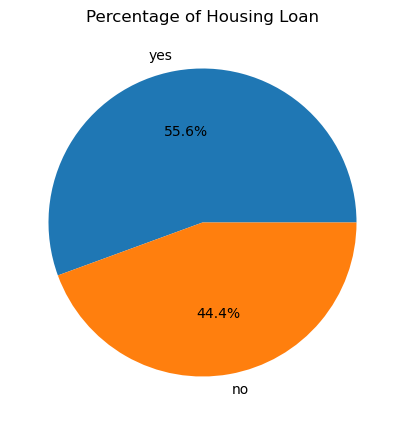

In [15]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['housing'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.1f}%')
print(df['housing'].value_counts())
ax.set_title('Percentage of Housing Loan')
plt.show();

#### Observation
- 55.6% of the customers took Housing Loan
- 44.4% of the customers did not take Housing Loan

no     37967
yes     7244
Name: loan, dtype: int64


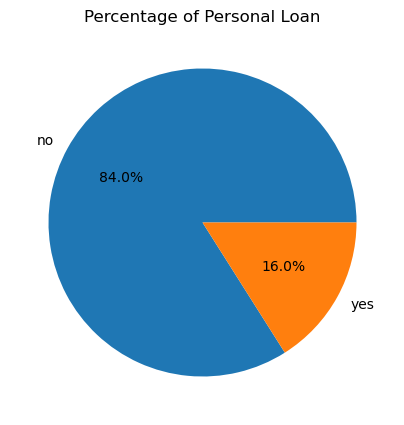

In [16]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['loan'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.1f}%')
print(df['loan'].value_counts())
ax.set_title('Percentage of Personal Loan')
plt.show();

#### Observation
- A greater percentage of the Customers(84%) did not take  Personal Loan
- only 16% of the Customer took Personal Loan

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


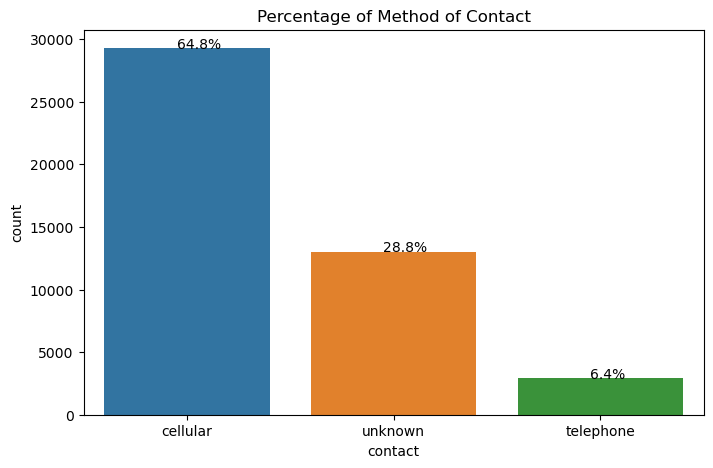

In [133]:
plt.figure(figsize=(8, 5))
ec = sns.countplot(x=df['contact'], data=df, order=df['contact'].value_counts(ascending=False).index)
ec.set_title('Percentage of Method of Contact')
for p in ec.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ec.annotate(percentage, (x, y), size=10)


print(df['contact'].value_counts());

#### Observation
- Cellular were the most used mode of contact with 64.8%, Unknown 28.8% and Telephone 6.4% 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


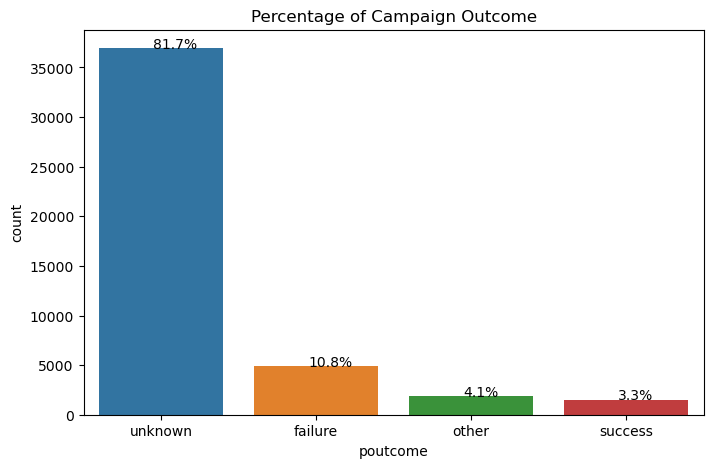

In [256]:
plt.figure(figsize=(8, 5))
ot = sns.countplot(x=df['poutcome'], data=df, order=df['poutcome'].value_counts(ascending=False).index)
ot.set_title('Percentage of Campaign Outcome')
for p in ot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/n)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height() + 2
    ot.annotate(percentage, (x, y), size=10)


print(df['poutcome'].value_counts());

#### Observation
- Only 3.3% of the campaign outcome was successful which is the least on the chart
- Unknown outcome has the greater percentage of 81.7%
- 10.8% of the campaign outcome is a failure followed by Other which is 4.1%

no     39922
yes     5289
Name: deposit, dtype: int64


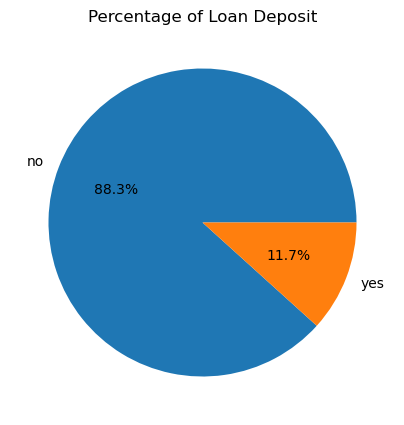

In [257]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['deposit'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.1f}%')
print(df['deposit'].value_counts())
ax.set_title('Percentage of Loan Deposit')
plt.show();

#### Observation
- 88.3 of the customers did not make deposit

Text(0.5, 1.0, 'Boxplot on Previous')

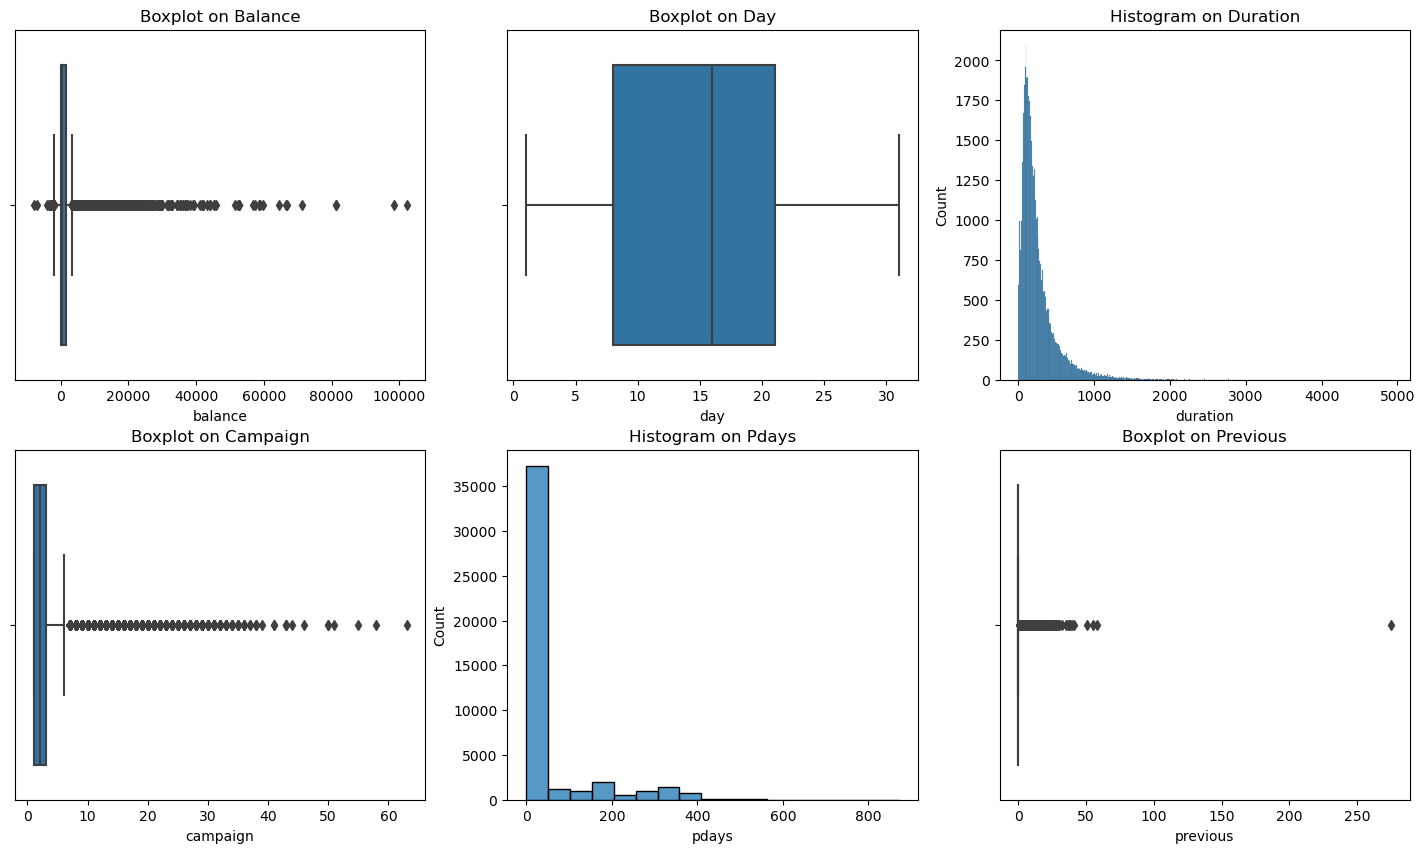

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
sns.boxplot(x='balance', data=df, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Balance')

sns.boxplot(x='day', data=df, ax=axs[0,1])
axs[0,1].set_title('Boxplot on Day')

sns.histplot(x='duration', data=df, ax=axs[0,2])
axs[0,2].set_title('Histogram on Duration')

sns.boxplot(x='campaign', data=df, ax=axs[1,0])
axs[1,0].set_title('Boxplot on Campaign')

sns.histplot(x='pdays', data=df, ax=axs[1,1])
axs[1,1].set_title('Histogram on Pdays')

sns.boxplot(x='previous', data=df, ax=axs[1,2])
axs[1,2].set_title('Boxplot on Previous')



#### Observation

BoxPlot on Balance
- I can observe that majority of the customers' account balance ranges between negative to less than 2000.
- There are couple of outliers from customers with negative and over 2000 on their accounts

BoxPlot on Day
- No outliers in the day customers were last contacted, the last contact is between 8 - 21 days

Histogram on Duration
- Duration on Histogram is positively skewed with couple of outliers
- Outliers are detected

BoxPlot on Campaign
- There are outliers on numbers of conatct made to the customers during marketing campaign

BoxPlot on Pdays
- There are outliers on numbers of days that passed by after the customers were last contacted

BoxPlot on Previous
- There are also ouliers on number of days customers were last contacted before the marketing campaign

### Bivariate Analysis

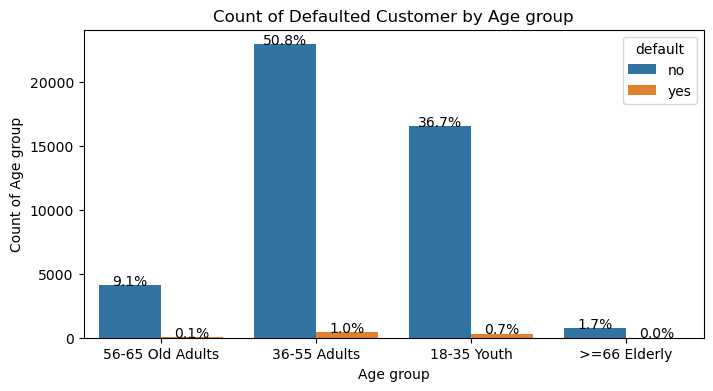

In [20]:
plt.figure(figsize=(8, 4))
at = sns.countplot(x='age_group', data=df, hue='default')
plt.xlabel('Age group')
plt.ylabel('Count of Age group')
plt.title('Count of Defaulted Customer by Age group')

for p in at.patches:
    height = p.get_height()
    at.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

#### Observation
- 1% of 51.8% of Customers between the ages of 36-55years defaulted their loans
- 0.7% of 37.4% of Customers between the ages of 18-35years defaulted their loans
- 0.1% of 9.2% of Customers between the ages of 56-65years defaulted their loans
- Customers with ages 66years and above did not dfault their loans

In [196]:
# Analysis on each Age Group
cross = pd.crosstab(index=df['age_group'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['age_group'], columns=df['default'])
cross_job

default,no,yes
age_group,,
18-35 Youth,16578,329
36-55 Adults,22970,434
56-65 Old Adults,4098,51
>=66 Elderly,750,1


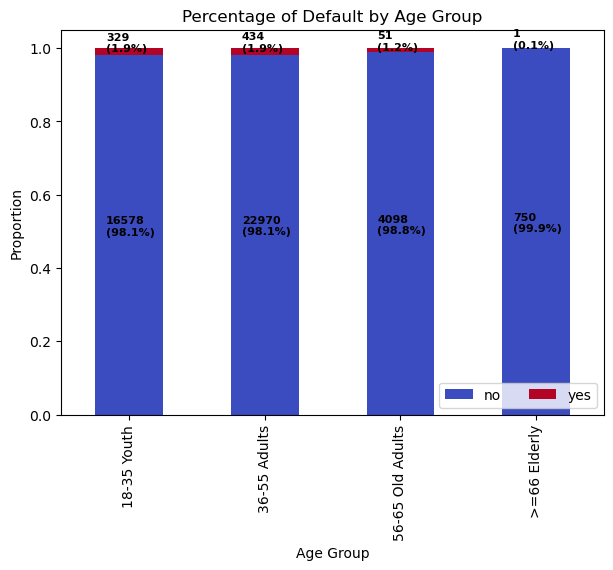

In [203]:

cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(7, 5))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.title('Percentage of Default by Age Group')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=8,
                 fontweight="bold")

plt.show()

- Youth(18-35) and Adult(36-55) have greater percentage of defaulters with 1.9% each
- Old Adults(56-65) has 1.2% defaulters, followed by Elderly with least deafulters of 0.1%

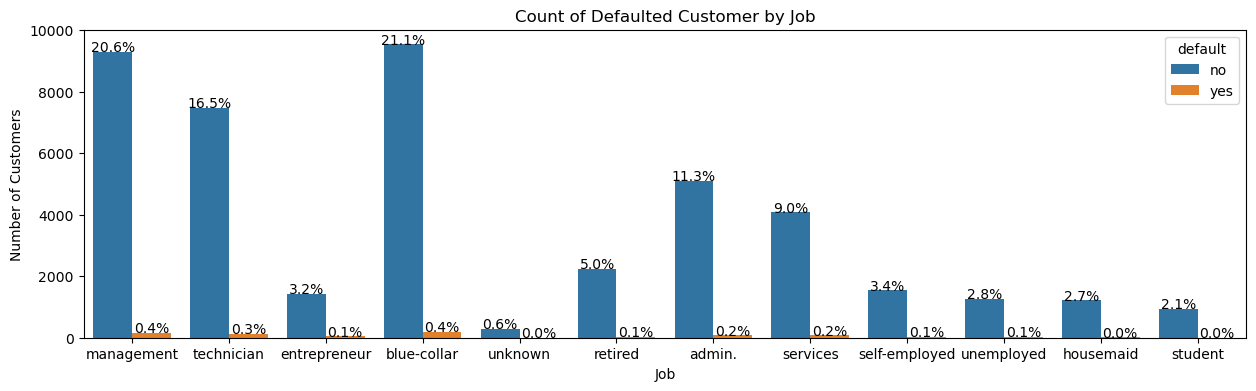

In [40]:
plt.figure(figsize=(15, 4))
jd = sns.countplot(x='job', data=df, hue='default')
plt.xlabel('Job')
plt.ylabel('Number of Customers')
plt.title('Count of Defaulted Customer by Job')

for p in jd.patches:
    height = p.get_height()
    jd.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [190]:
# Percentage of Defaults by Job type per Customers
cross = pd.crosstab(index=df['job'], columns=df['default'], normalize="index")

In [191]:
cross_job = pd.crosstab(index=df['job'], columns=df['default'])
cross_job

default,no,yes
job,,
admin.,5097,74
blue-collar,9531,201
entrepreneur,1432,55
housemaid,1218,22
management,9294,164
retired,2238,26
self-employed,1546,33
services,4079,75
student,935,3


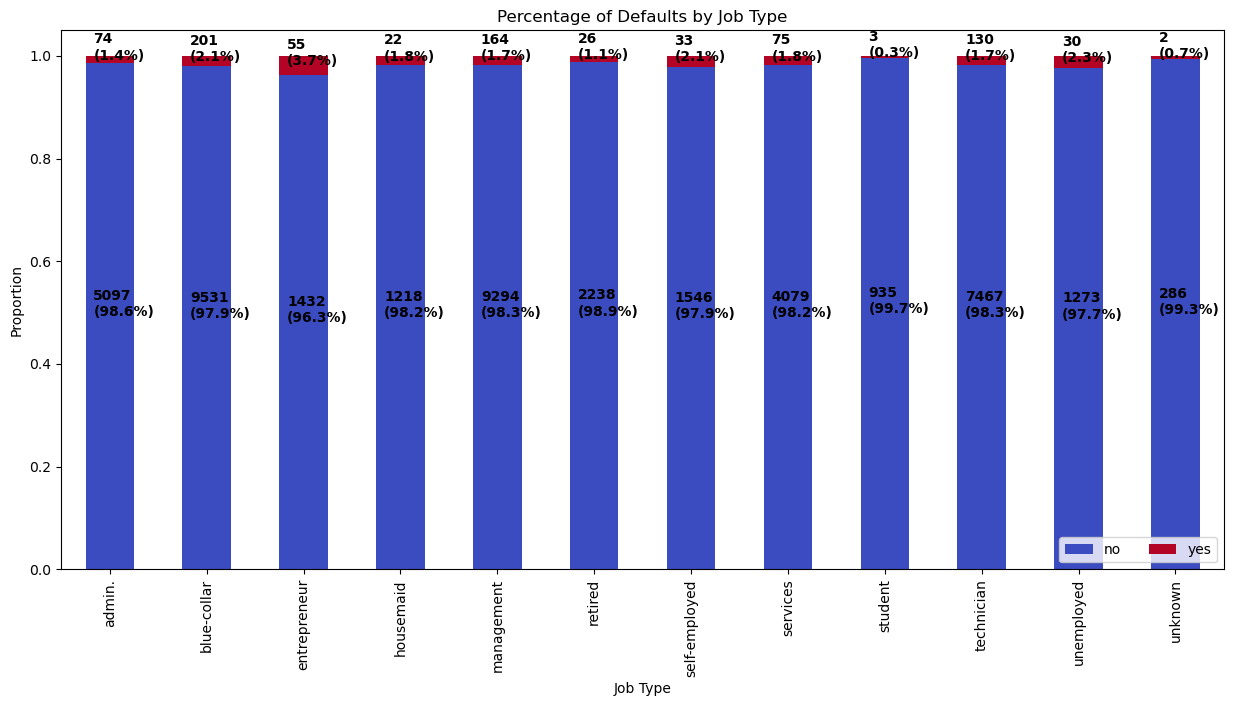

In [192]:
#plt.figure(figsize=(10, 13))
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Job Type')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- 3.7%(of 100%) of Entrepreneur Customers defaulted their loans, followed by Unemployed with 2.3% defauted their loans
- Students and Unknown has the least percentage of defaults with 0.3% and 0.7% of 100%respectively

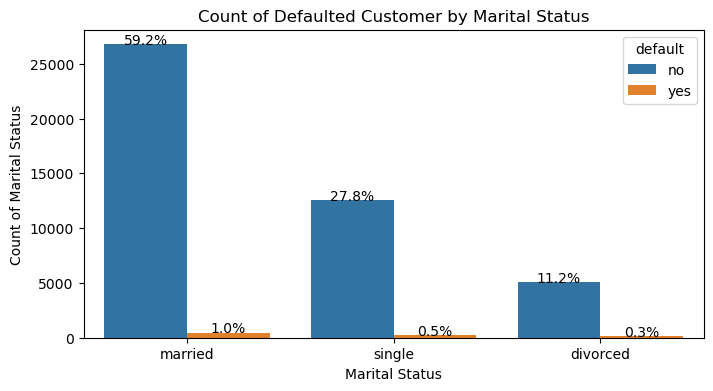

In [208]:
plt.figure(figsize=(8, 4))
ms = sns.countplot(x='marital', data=df, hue='default')
plt.xlabel('Marital Status')
plt.ylabel('Count of Marital Status')
plt.title('Count of Defaulted Customer by Marital Status')

for p in ms.patches:
    height = p.get_height()
    ms.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [193]:
# Percentage of Defaults by Marital Status per Customers
cross = pd.crosstab(index=df['marital'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['marital'], columns=df['default'])
cross_job

default,no,yes
marital,,
divorced,5079,128
married,26766,448
single,12551,239


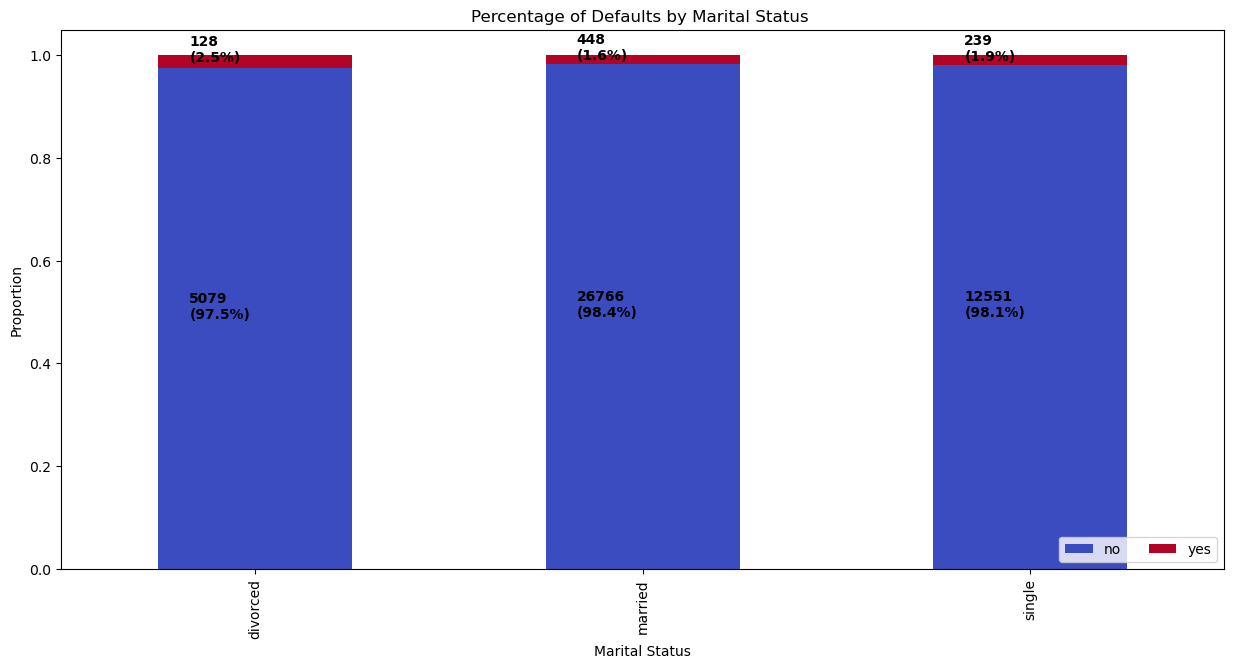

In [194]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Marital Status ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Obsrvation 
- Divorced has a greater percentage of 2.5% of 100%, followed by Single with 1.9%
- Married recorded the least default of 1.6% of 100%

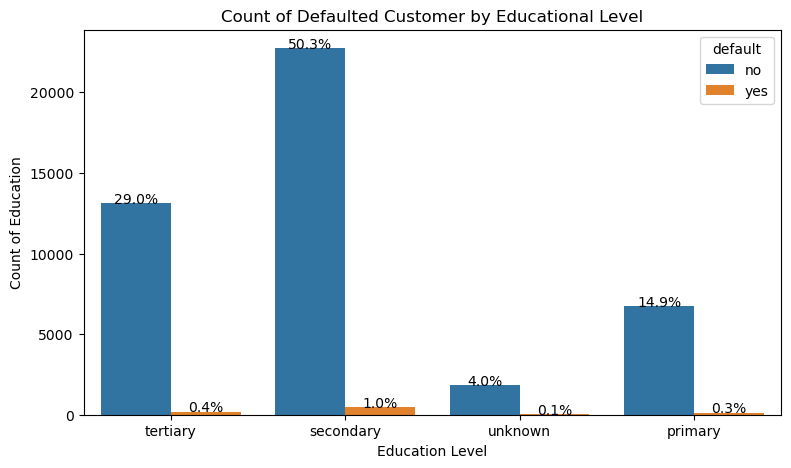

In [209]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='education', data=df, hue='default')
plt.xlabel('Education Level')
plt.ylabel('Count of Education')
plt.title('Count of Defaulted Customer by Educational Level')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [204]:
# Percentage of Defaults by Education Level per Customers
cross = pd.crosstab(index=df['education'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['education'], columns=df['default'])
cross_job

default,no,yes
education,,
primary,6724,127
secondary,22744,458
tertiary,13103,198
unknown,1825,32


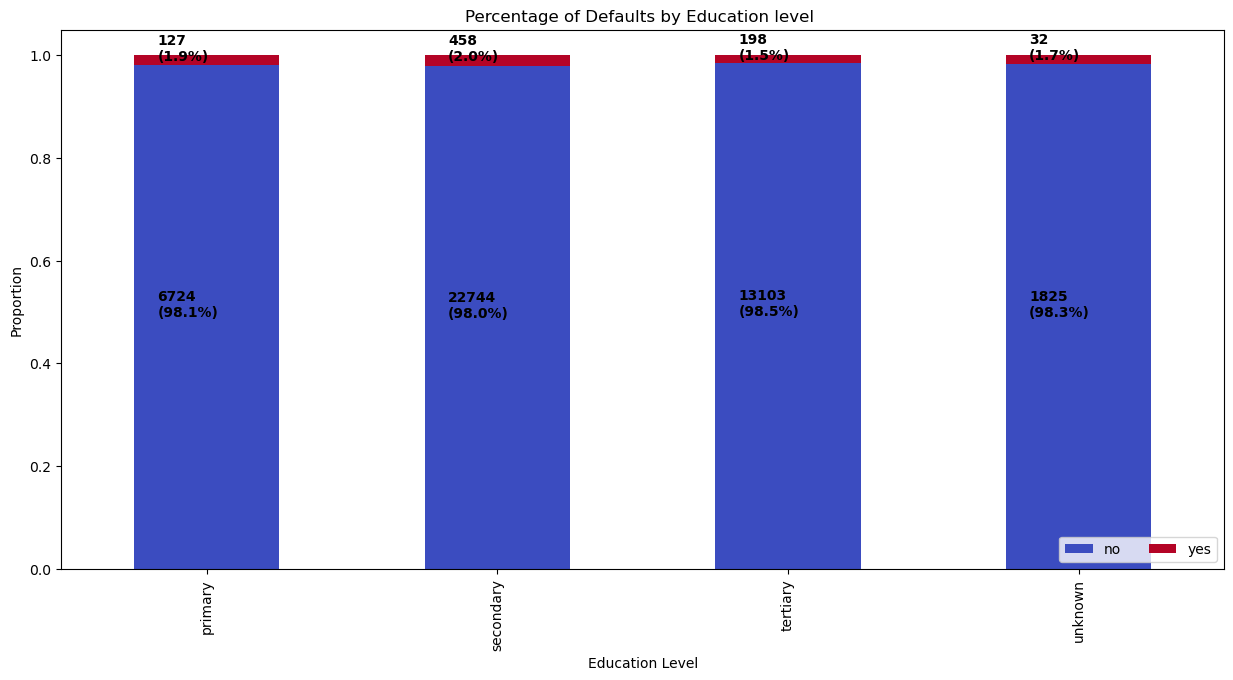

In [205]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Education level ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- It is observed that default by Education level is close to each other.
- Seconday and Primary educational level have greater percentage with 2% and 1.9% respectively  

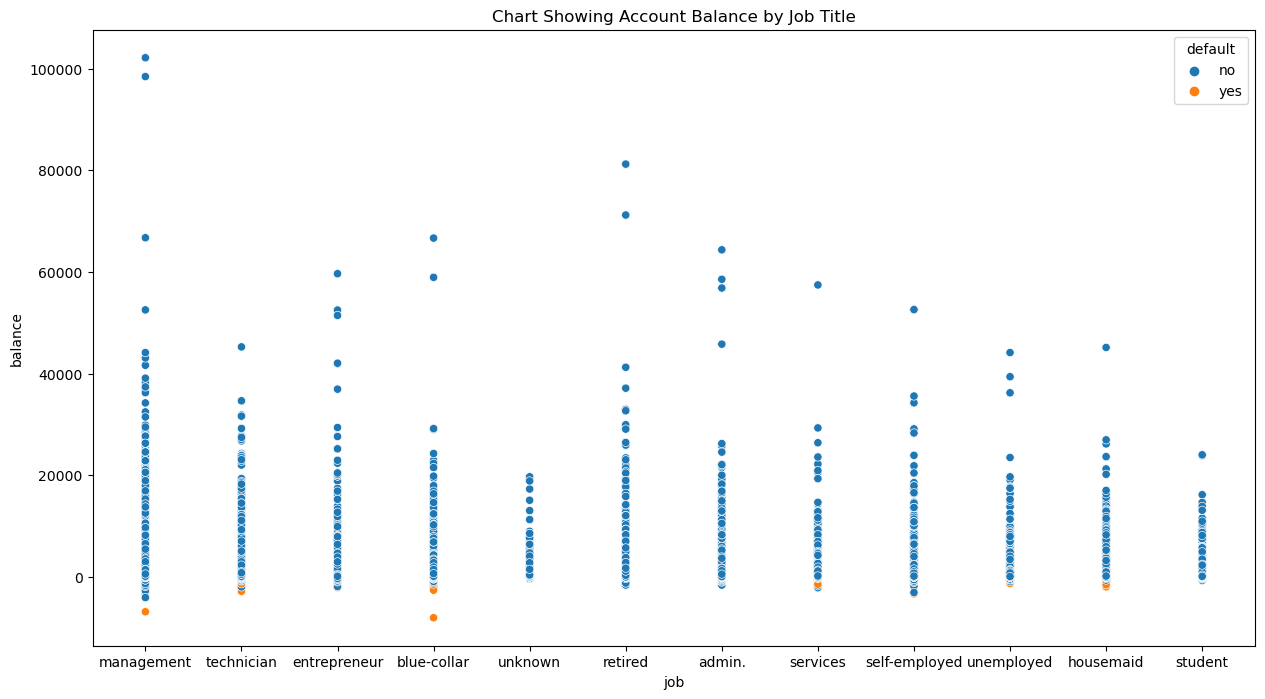

In [347]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='job', y='balance', hue='default', data=df)
plt.title('Chart Showing Account Balance by Job Title');

#### Observation
- It is observed that majority of the customers with positive account balance did not default and nearly all customers with negative account balance defaulted their loans
- it is also observed that some customers with positive account balance defaulted while some with negative did not

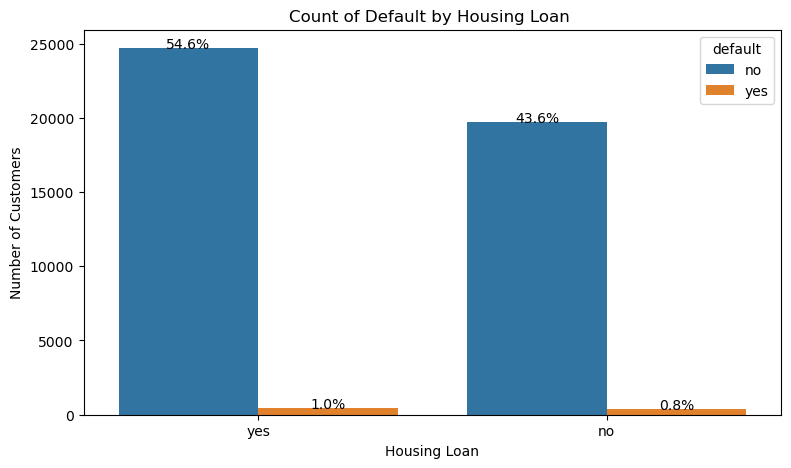

In [136]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='housing', data=df, hue='default')
plt.xlabel('Housing Loan')
plt.ylabel('Number of Customers')
plt.title('Count of Default by Housing Loan ')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [206]:
# Percentage of Defaults by Housing Loan per Customers
cross = pd.crosstab(index=df['housing'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['housing'], columns=df['default'])
cross_job

default,no,yes
housing,,
no,19701,380
yes,24695,435


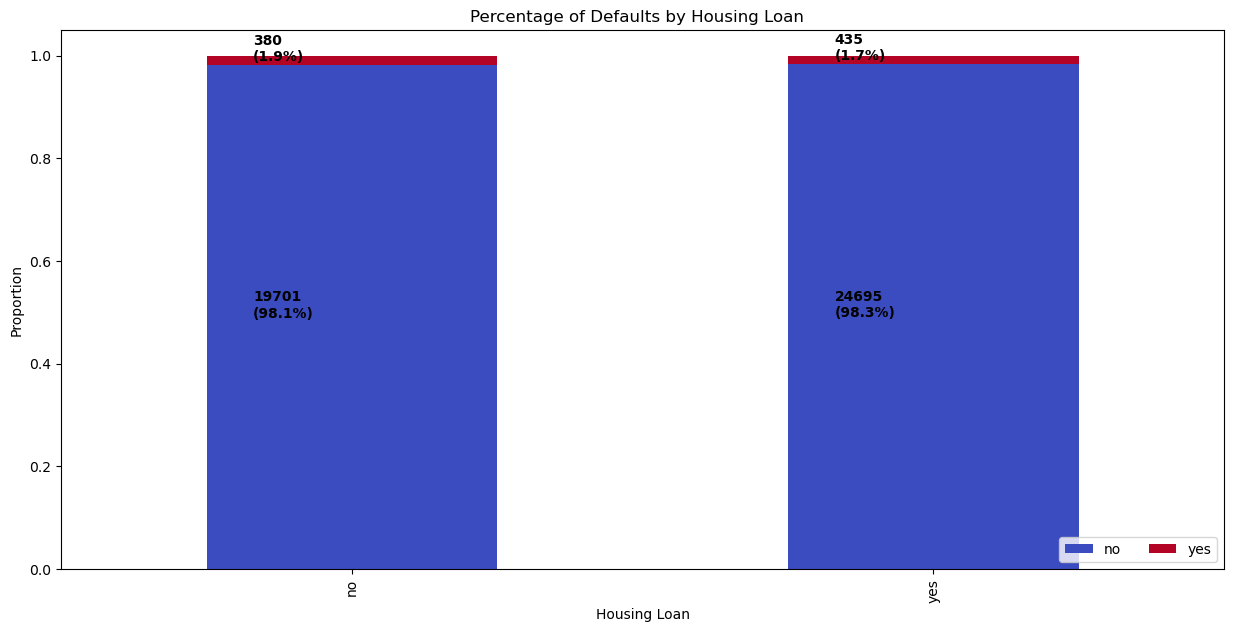

In [208]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Housing Loan")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Housing Loan  ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- 1.7% of customers that were given housing loan defaulted

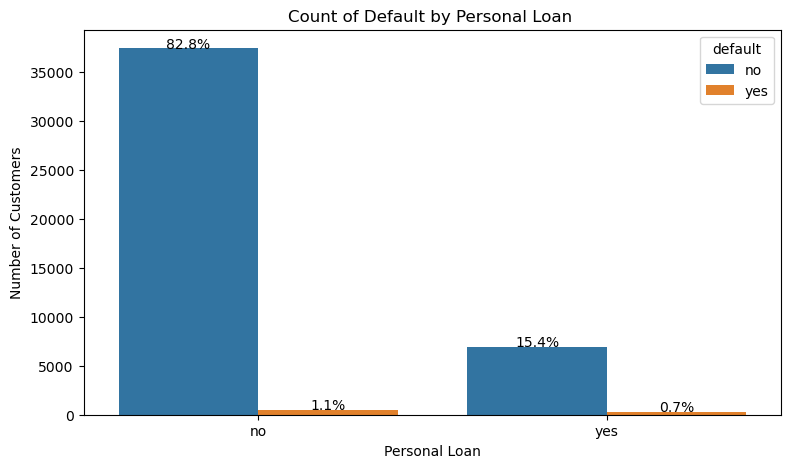

In [137]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='loan', data=df, hue='default')
plt.xlabel('Personal Loan')
plt.ylabel('Number of Customers')
plt.title('Count of Default by Personal Loan ')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [209]:
# Percentage of Defaults by Personal Loan per Customers
cross = pd.crosstab(index=df['loan'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['loan'], columns=df['default'])
cross_job

default,no,yes
loan,,
no,37453,514
yes,6943,301


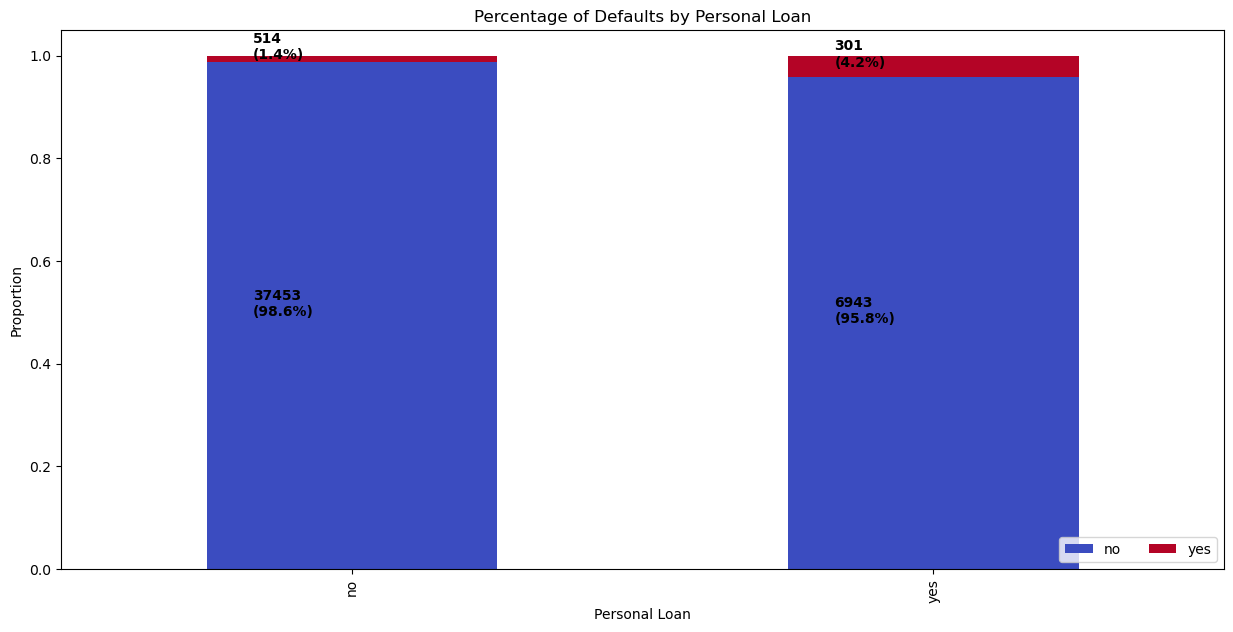

In [211]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Personal Loan")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Personal Loan')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation 
- 4.2% of customers that were given personal loan defaulted

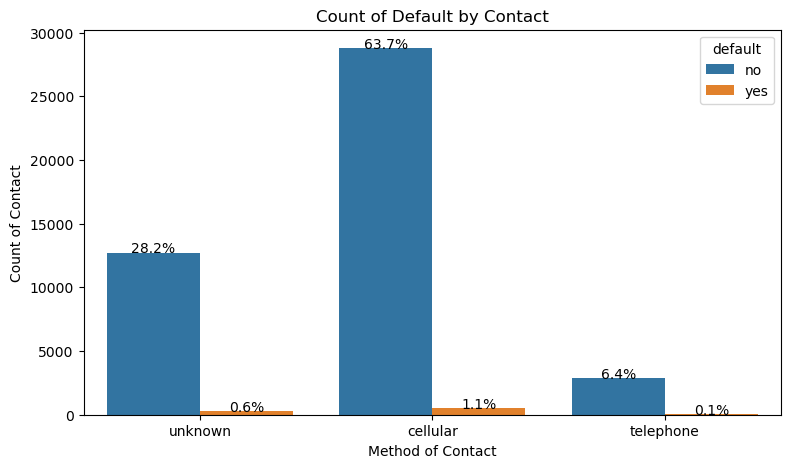

In [138]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='contact', data=df, hue='default')
plt.xlabel('Method of Contact')
plt.ylabel('Count of Contact')
plt.title('Count of Default by Contact')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [212]:
# Percentage of Defaults by Contact per Customers
cross = pd.crosstab(index=df['contact'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['contact'], columns=df['default'])
cross_job

default,no,yes
contact,,
cellular,28786,499
telephone,2879,27
unknown,12731,289


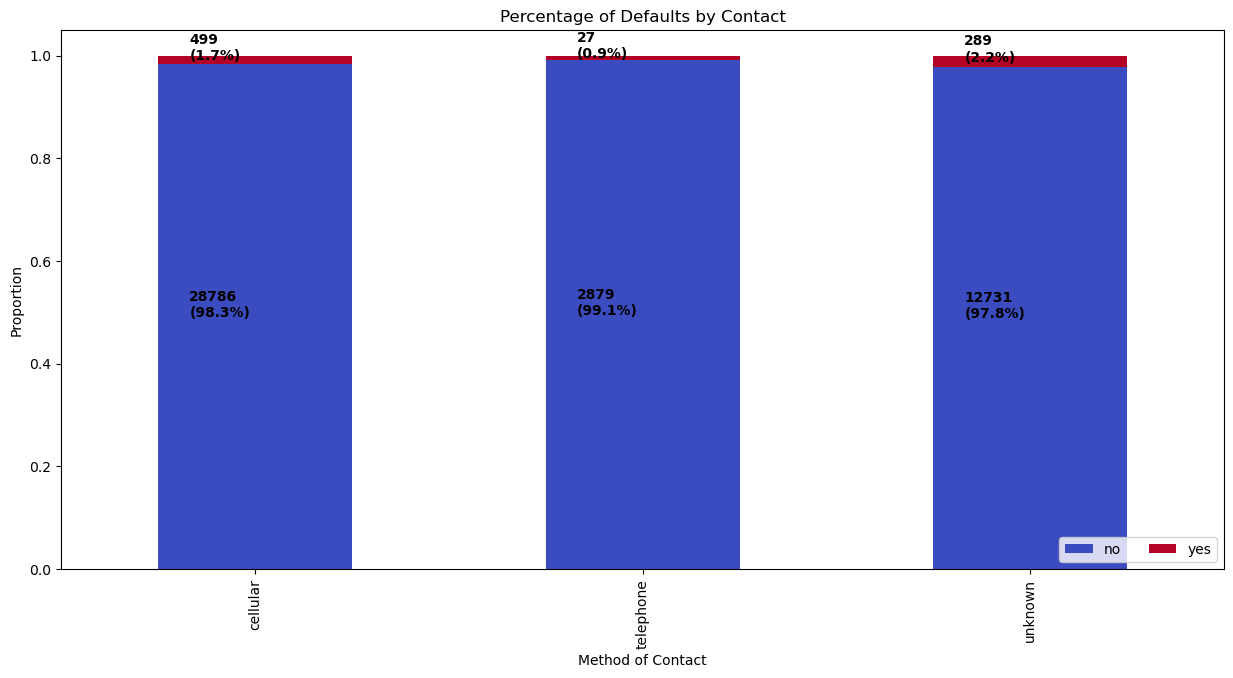

In [214]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Method of Contact")
plt.ylabel("Proportion")
plt.title('Percentage of Defaults by Contact')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- 2.2% of customers contacted with unknown defaulted their loans, followed by cellular with 1.7%
- Customers contacted with telephone have least default of 0.9%

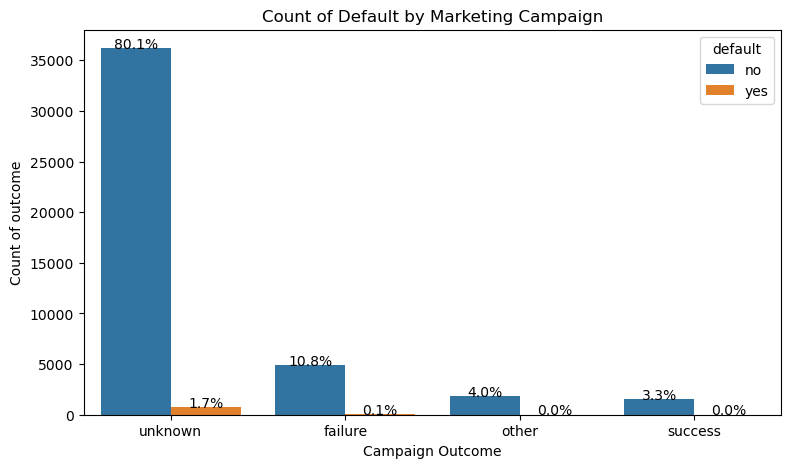

In [139]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='poutcome', data=df, hue='default')
plt.xlabel('Campaign Outcome')
plt.ylabel('Count of outcome')
plt.title('Count of Default by Marketing Campaign')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [262]:
# Percentage of Defaults by Marketing Campaign per Customers
cross = pd.crosstab(index=df['poutcome'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['poutcome'], columns=df['default'])
cross_job

default,no,yes
poutcome,,
failure,4862,39
other,1824,16
success,1509,2
unknown,36201,758


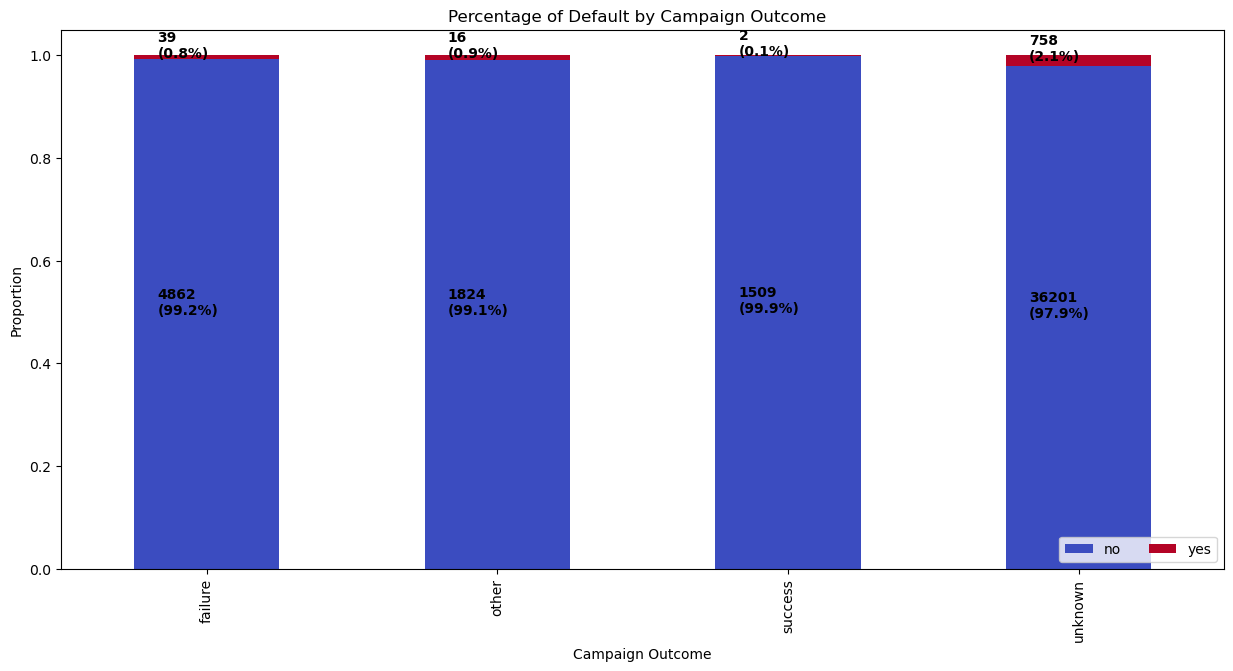

In [263]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Campaign Outcome")
plt.ylabel("Proportion")
plt.title('Percentage of Default by Campaign Outcome  ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Unknown campaign outcome has the highest percentage of default of 2.1%, followed by other with 0.9% and failure 0.8%
- Success outcome is relatively low with 0.1%

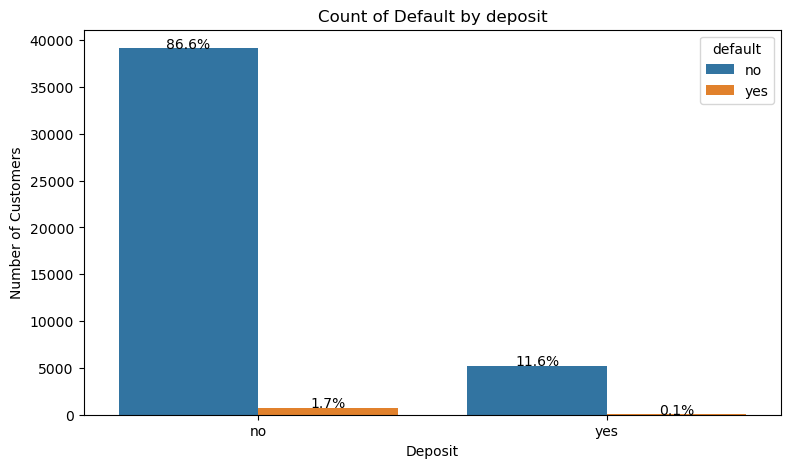

In [216]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='deposit', data=df, hue='default')
plt.xlabel('Deposit')
plt.ylabel('Number of Customers')
plt.title('Count of Default by deposit')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [217]:
# Percentage of Defaults by Deposit per Customers
cross = pd.crosstab(index=df['deposit'], columns=df['default'], normalize="index")
cross_job = pd.crosstab(index=df['deposit'], columns=df['default'])
cross_job

default,no,yes
deposit,,
no,39159,763
yes,5237,52


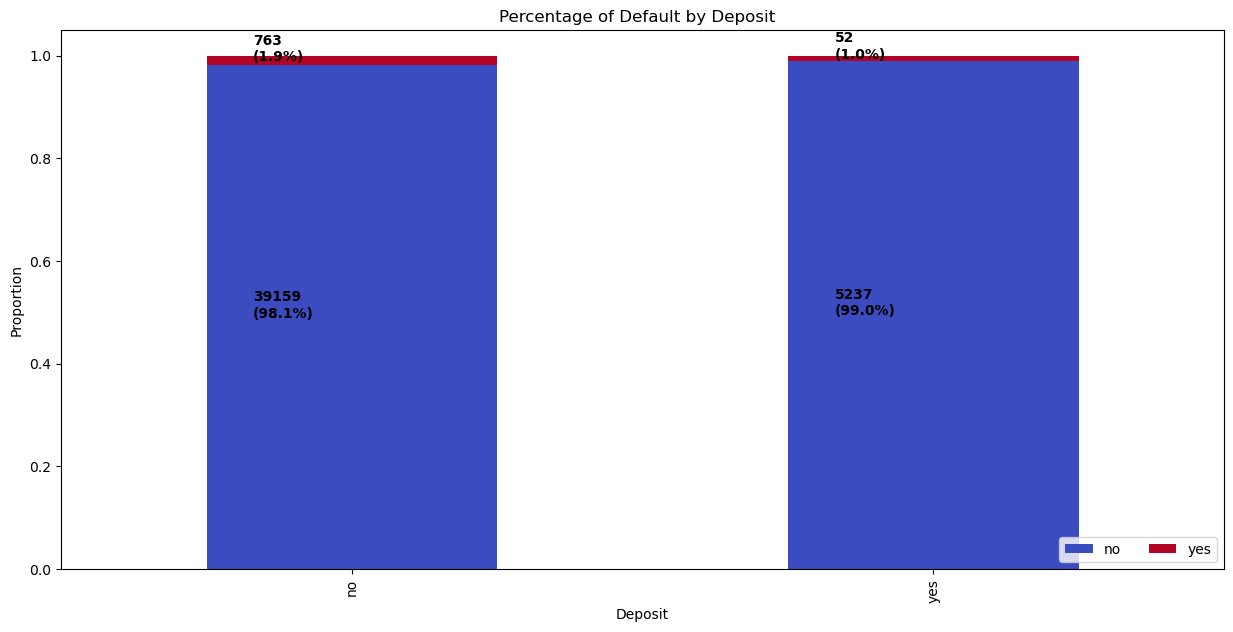

In [218]:
cross.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Deposit")
plt.ylabel("Proportion")
plt.title('Percentage of Default by Deposit  ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- A greater percentage (1.9%) of Customers with no deposit defaulted their loans

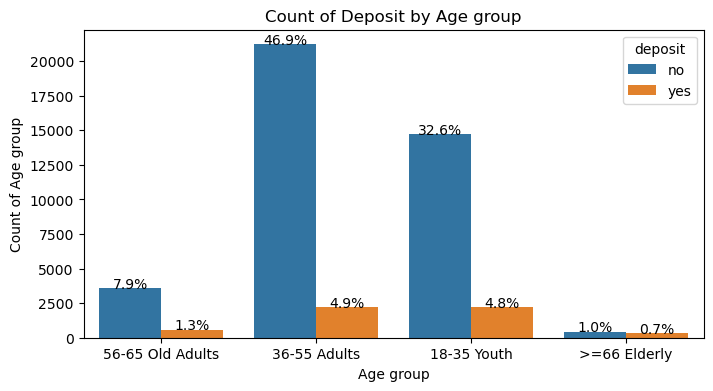

In [217]:
plt.figure(figsize=(8, 4))
at = sns.countplot(x='age_group', data=df, hue='deposit')
plt.xlabel('Age group')
plt.ylabel('Count of Age group')
plt.title('Count of Deposit by Age group')

for p in at.patches:
    height = p.get_height()
    at.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [219]:
# Percentage of Deposit by Age Group per Customers
cross = pd.crosstab(index=df['age_group'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['age_group'], columns=df['deposit'])
cross_job

deposit,no,yes
age_group,,
18-35 Youth,14718,2189
36-55 Adults,21210,2194
56-65 Old Adults,3563,586
>=66 Elderly,431,320


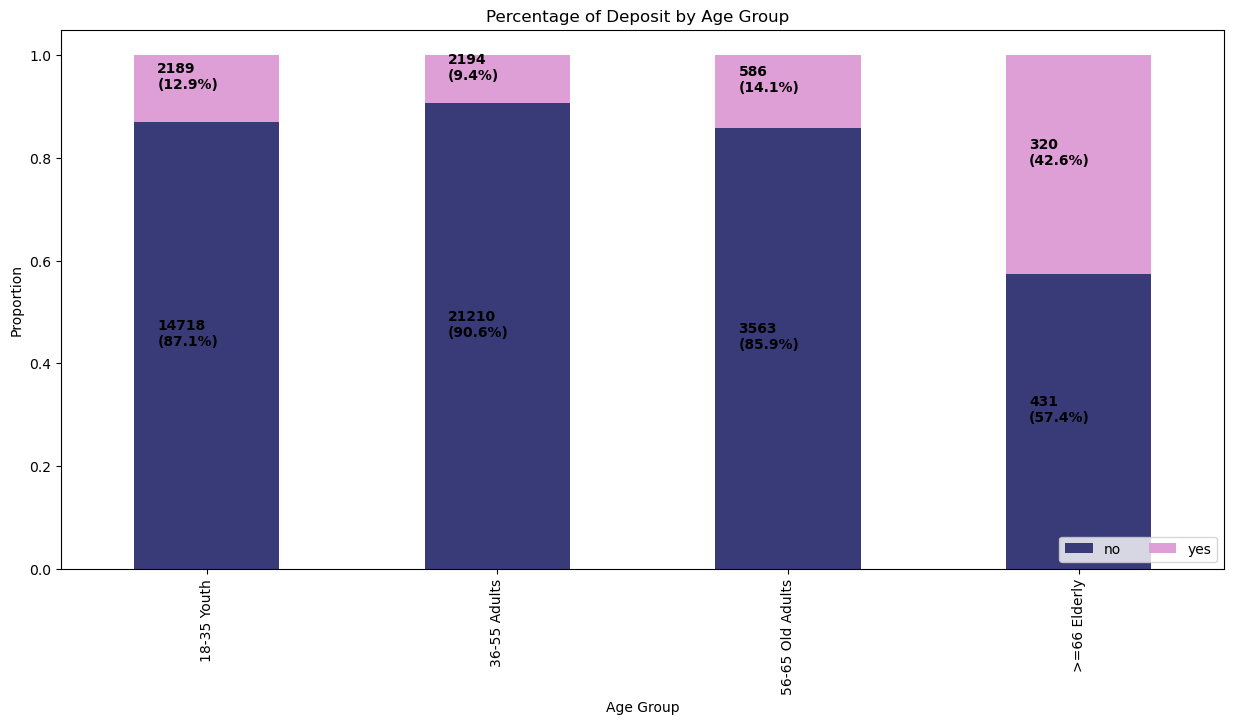

In [229]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Age Group")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Age Group  ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Customers above 66 years have greater percentage of deposit of 42.6%, customers(56-65years) with 14.1%
- 36-55years have the least percentage of deposit of 9.4%

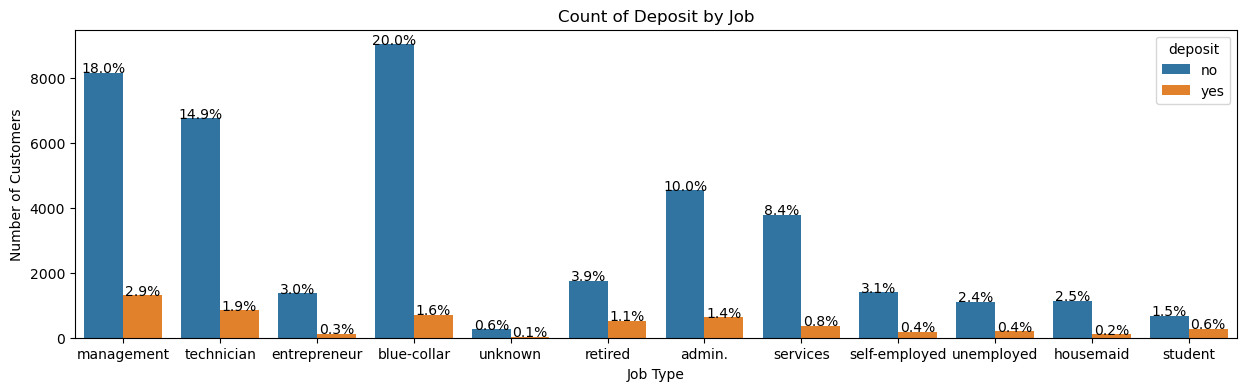

In [146]:
plt.figure(figsize=(15, 4))
jd = sns.countplot(x='job', data=df, hue='deposit')
plt.xlabel('Job Type')
plt.ylabel('Number of Customers')
plt.title('Count of Deposit by Job')

for p in jd.patches:
    height = p.get_height()
    jd.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [260]:
# Percentage of Deposit by Job Type per Customers
cross = pd.crosstab(index=df['job'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['job'], columns=df['deposit'])
cross_job

deposit,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


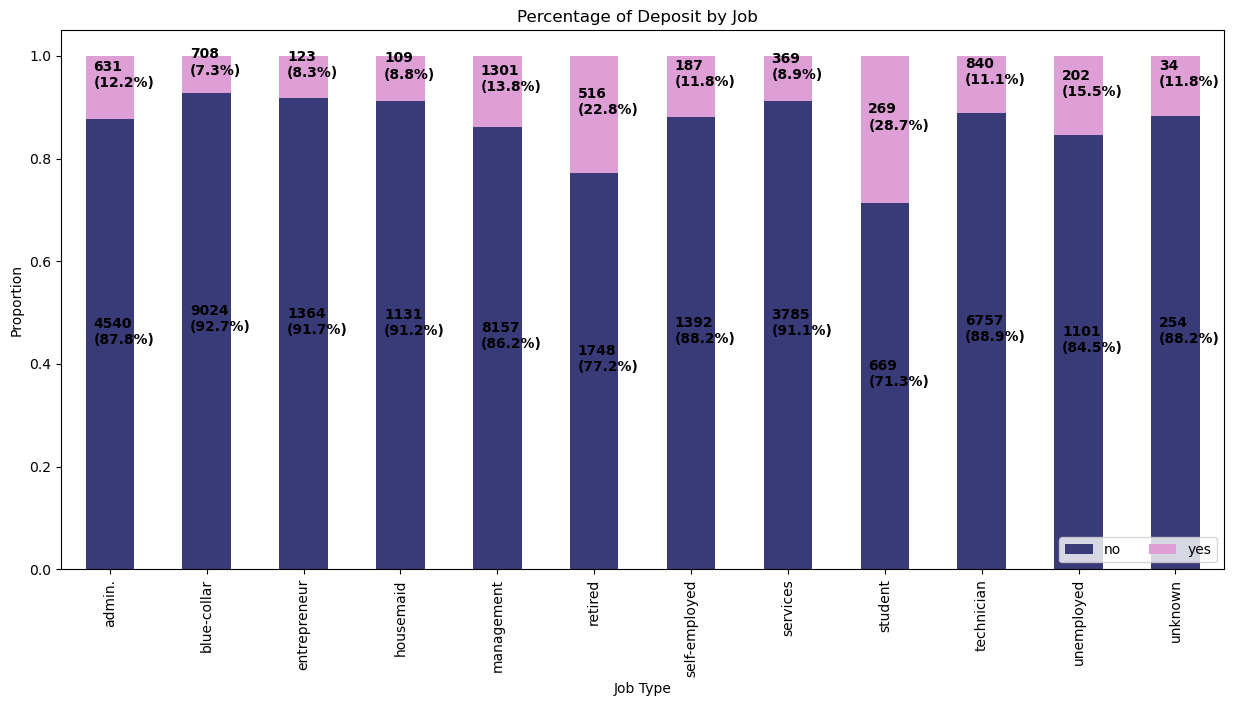

In [261]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Job Type")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Job  ')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Students deposited more for their loans 28.7%, followed by retired 22.8% and unemployed 15.5%
- Least percentage of deposit from blue-colar job 7.3% 

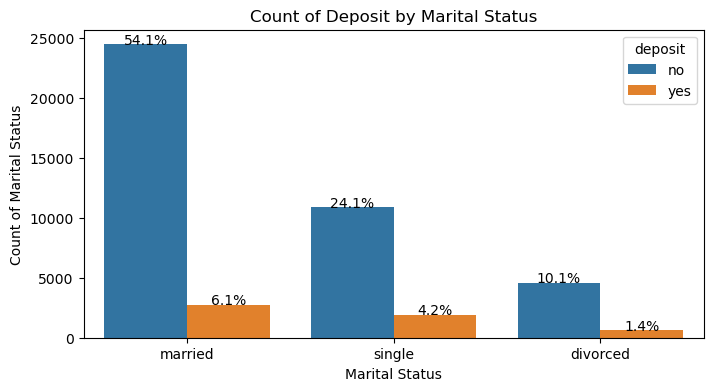

In [219]:
plt.figure(figsize=(8, 4))
ms = sns.countplot(x='marital', data=df, hue='deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count of Marital Status')
plt.title('Count of Deposit by Marital Status')

for p in ms.patches:
    height = p.get_height()
    ms.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [232]:
# Percentage of Deposit by Marital Status per Customers
cross = pd.crosstab(index=df['marital'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['marital'], columns=df['deposit'])
cross_job

deposit,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


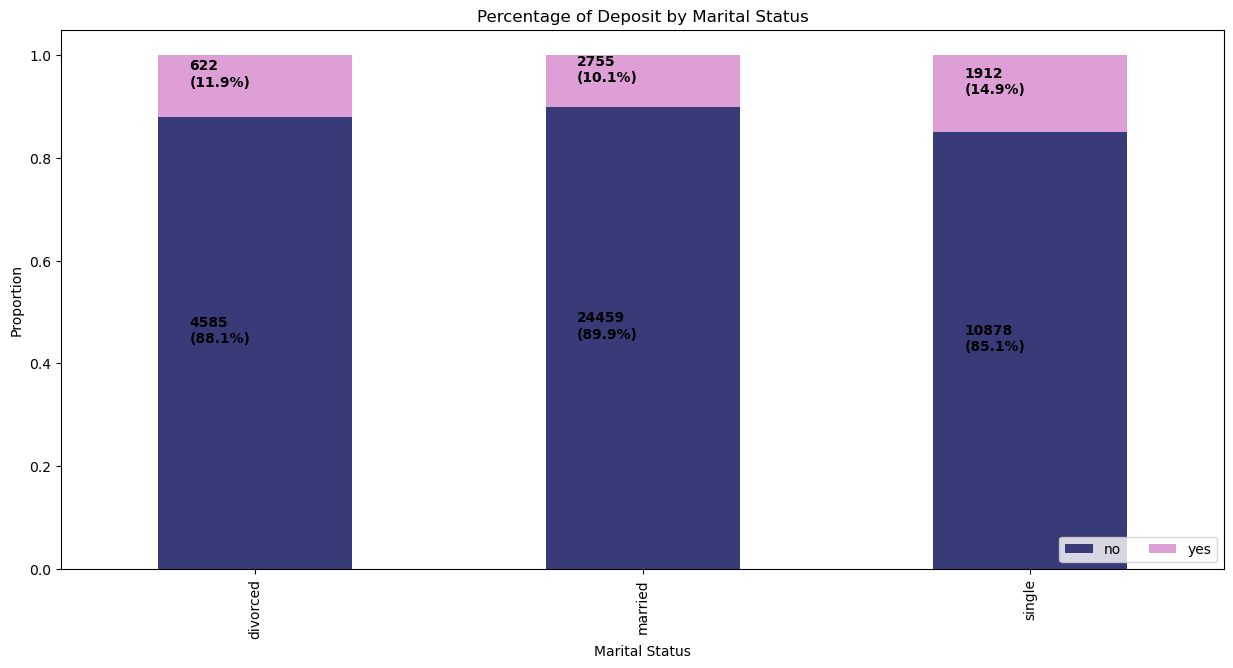

In [233]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Marital Status")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Marital Status')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Single customers the highest deposit percentage of 14.9%, followed by divorced 11.9%
- Low deposit from married 10.1%

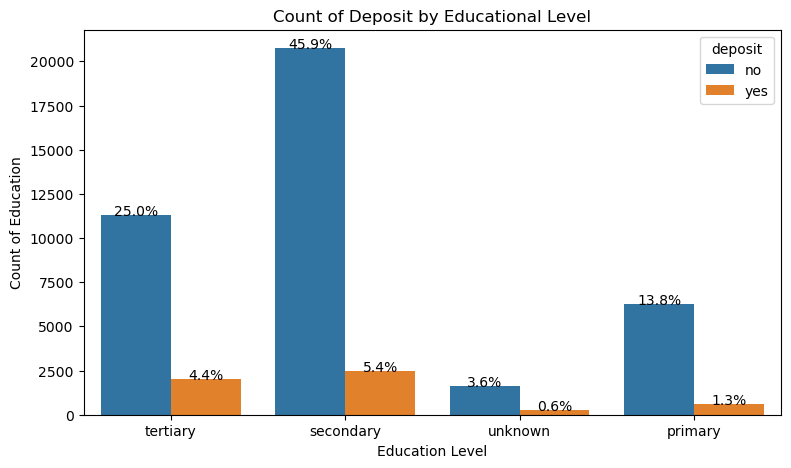

In [220]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='education', data=df, hue='deposit')
plt.xlabel('Education Level')
plt.ylabel('Count of Education')
plt.title('Count of Deposit by Educational Level')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [234]:
# Percentage of Deposit by Education Level per Customers
cross = pd.crosstab(index=df['education'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['education'], columns=df['deposit'])
cross_job

deposit,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


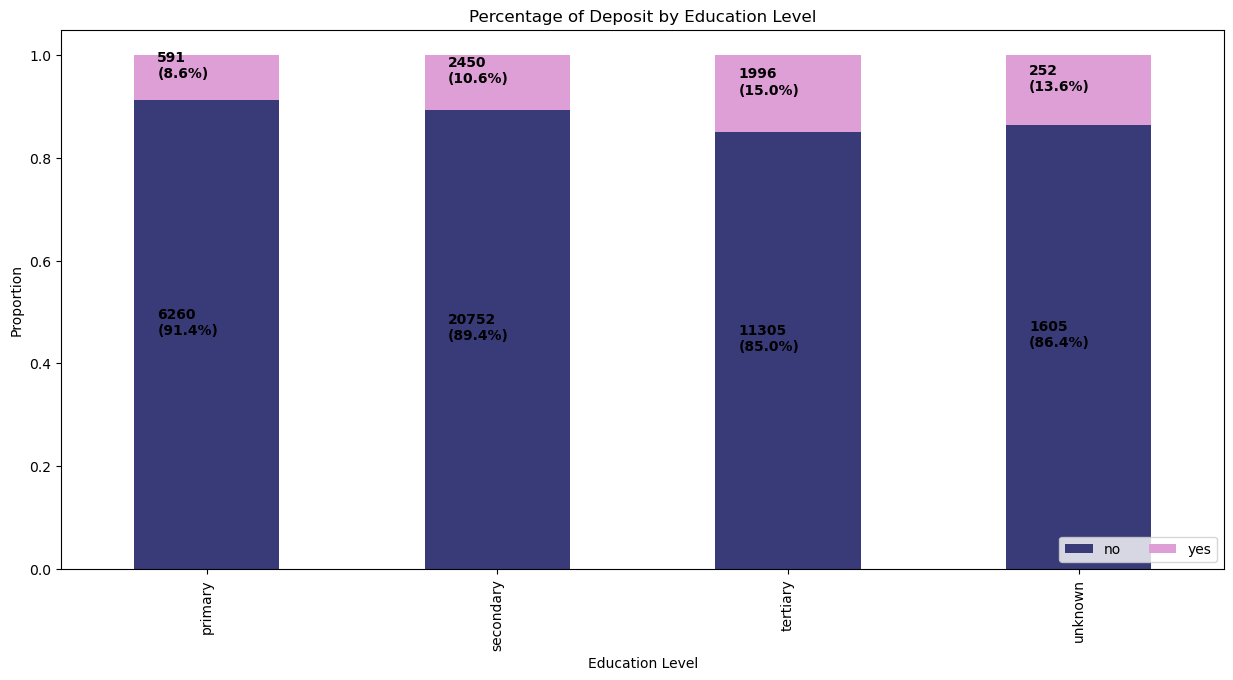

In [235]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Education Level')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Customers with tertiary eduaction deposited more with 15%, followed by unknown 13.6%, secondary  10.6%
- Low deposit from primary 10.1%

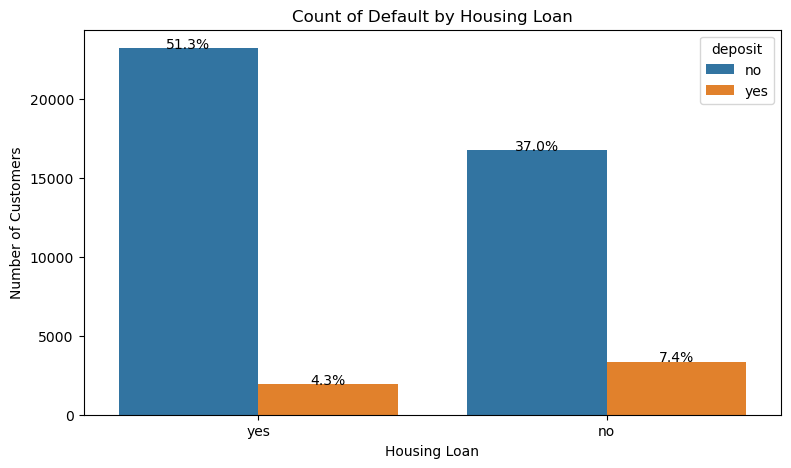

In [140]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='housing', data=df, hue='deposit')
plt.xlabel('Housing Loan')
plt.ylabel('Number of Customers')
plt.title('Count of Default by Housing Loan')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [236]:
# Percentage of Deposit by Housing Loan per Customers
cross = pd.crosstab(index=df['housing'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['housing'], columns=df['deposit'])
cross_job

deposit,no,yes
housing,,
no,16727,3354
yes,23195,1935


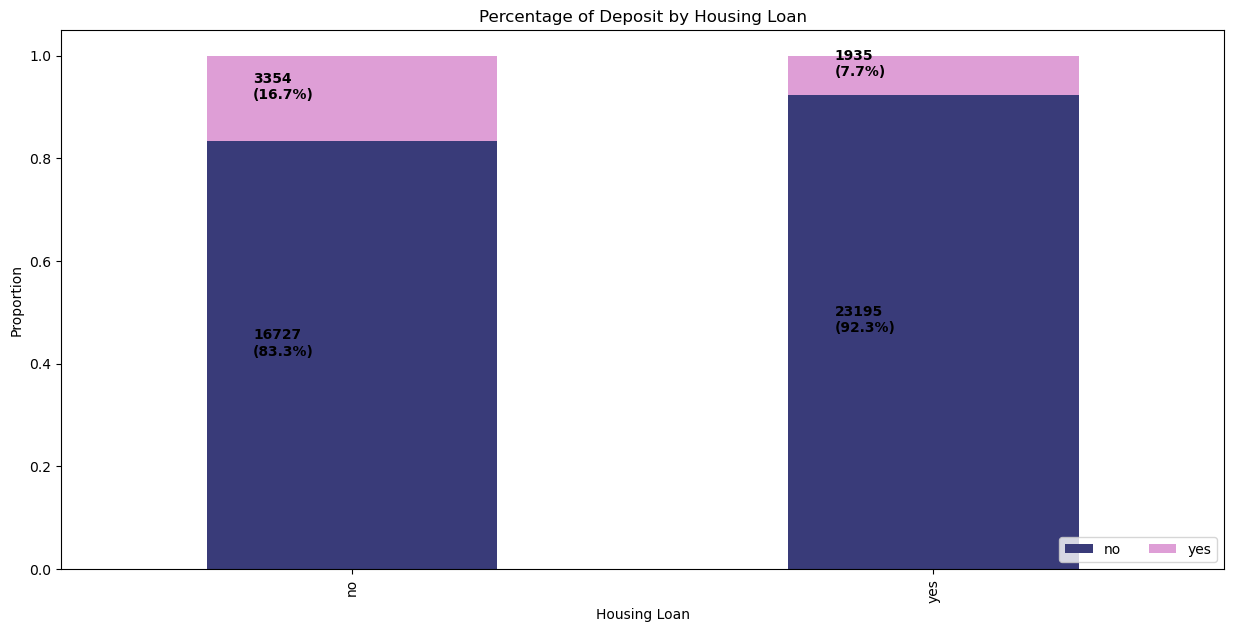

In [237]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Housing Loan")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Housing Loan')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Low deposit percentage (7.7%) from customers that did not obtain housing loan
- 16.7% deposit from customers with no housing loan

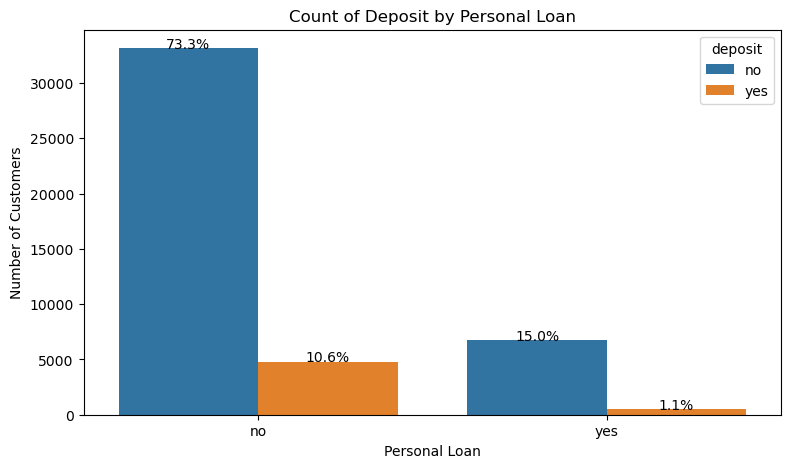

In [141]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='loan', data=df, hue='deposit')
plt.xlabel('Personal Loan')
plt.ylabel('Number of Customers')
plt.title('Count of Deposit by Personal Loan')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [238]:
# Percentage of Deposit by Personal Loan per Customers
cross = pd.crosstab(index=df['loan'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['loan'], columns=df['deposit'])
cross_job

deposit,no,yes
loan,,
no,33162,4805
yes,6760,484


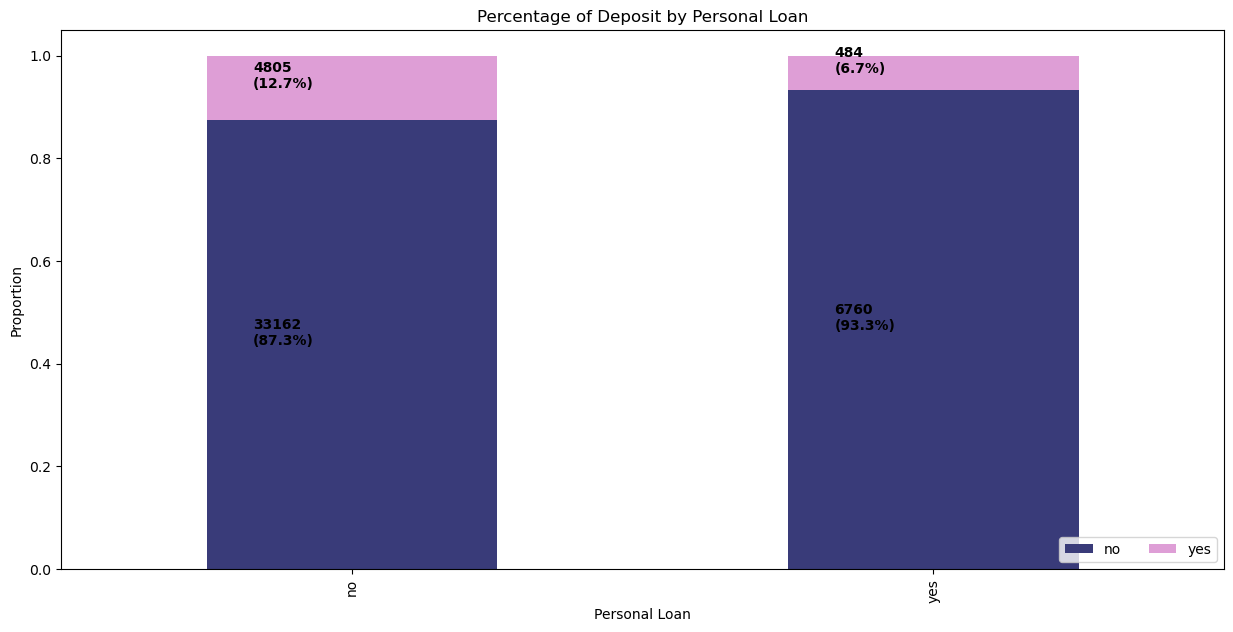

In [239]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Personal Loan")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Personal Loan')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Low deposit percentage (6.7%) from customers that did not obtain personal loan
- 12.7% deposit from customers with no personal loan

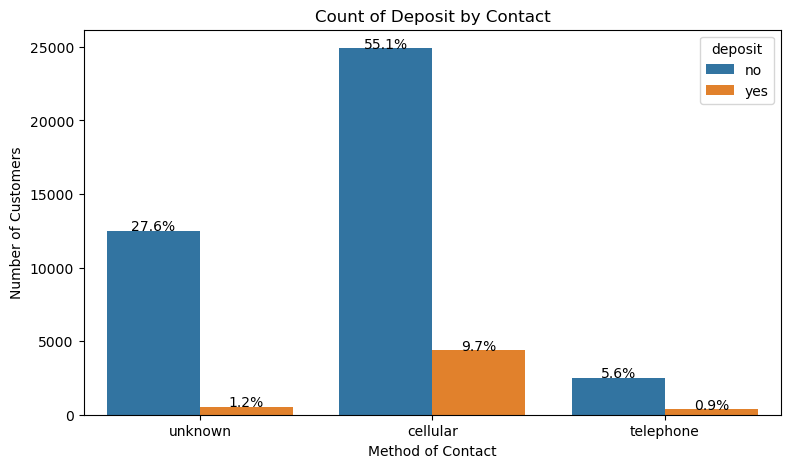

In [142]:
plt.figure(figsize=(9, 5))
ec = sns.countplot(x='contact', data=df, hue='deposit')
plt.xlabel('Method of Contact')
plt.ylabel('Number of Customers')
plt.title('Count of Deposit by Contact')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [240]:
# Percentage of Deposit by Contact per Customers
cross = pd.crosstab(index=df['contact'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['contact'], columns=df['deposit'])
cross_job

deposit,no,yes
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12490,530


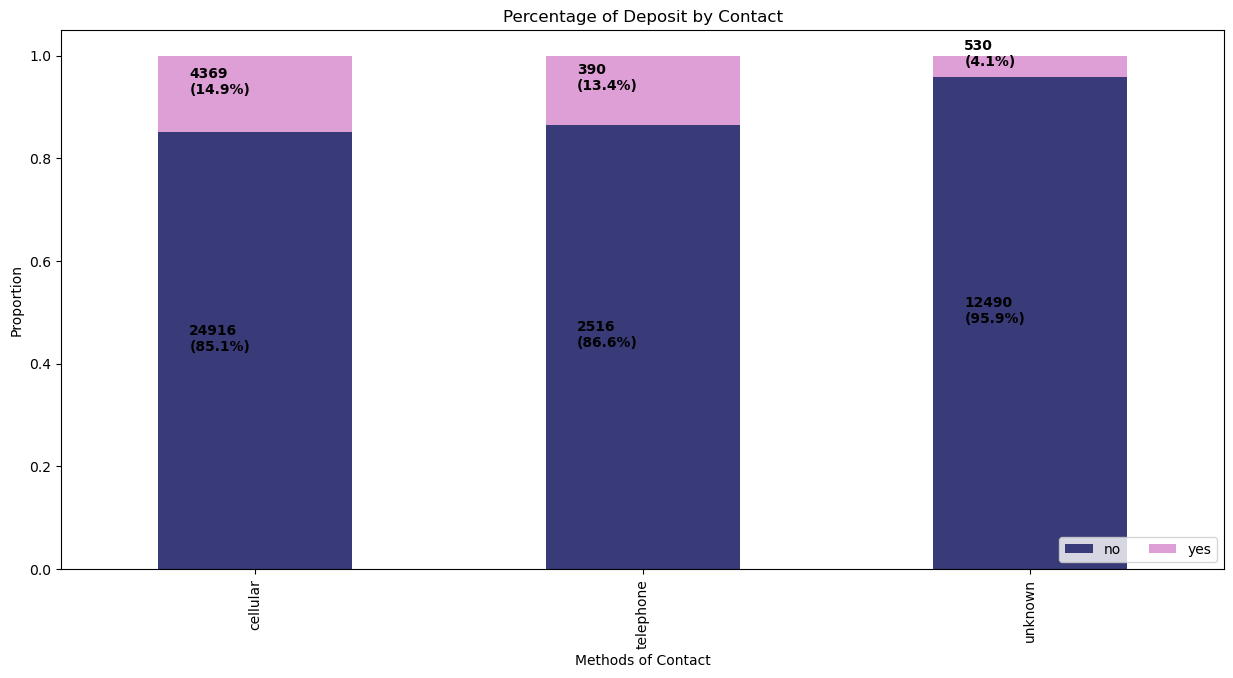

In [241]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Methods of Contact")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Contact')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Customers contacted through cellular made more deposit 14.9% than telephone 13.4%
- Customers contacted with unknown made least deposit of 4.1%

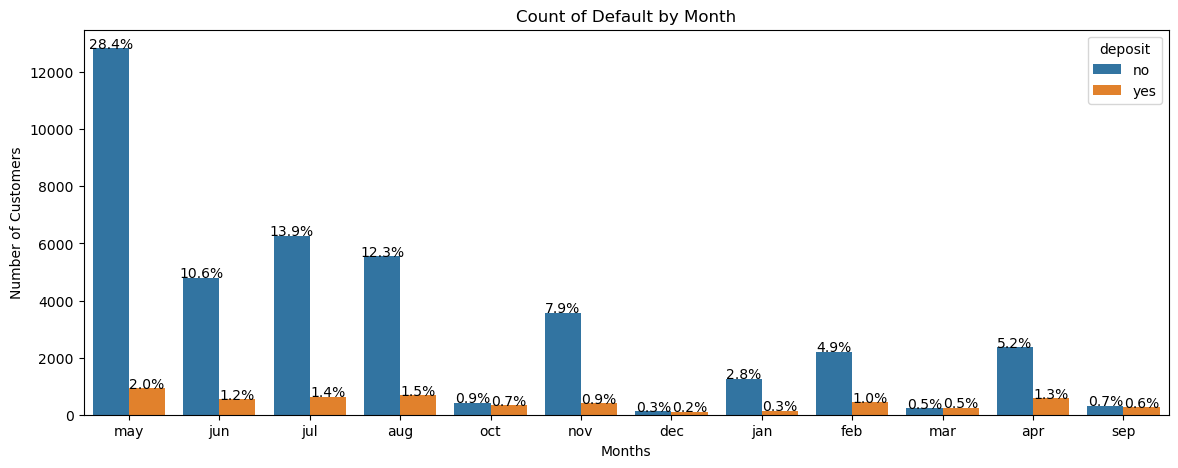

In [145]:
# to relabel the axis
plt.figure(figsize=(14, 5))
ec = sns.countplot(x='month', data=df, hue='deposit')
plt.xlabel('Months')
plt.ylabel('Number of Customers')
plt.title('Count of Default by Month')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [258]:
# Percentage of Deposit by Month per Customers
cross = pd.crosstab(index=df['month'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['month'], columns=df['deposit'])
cross_job

deposit,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


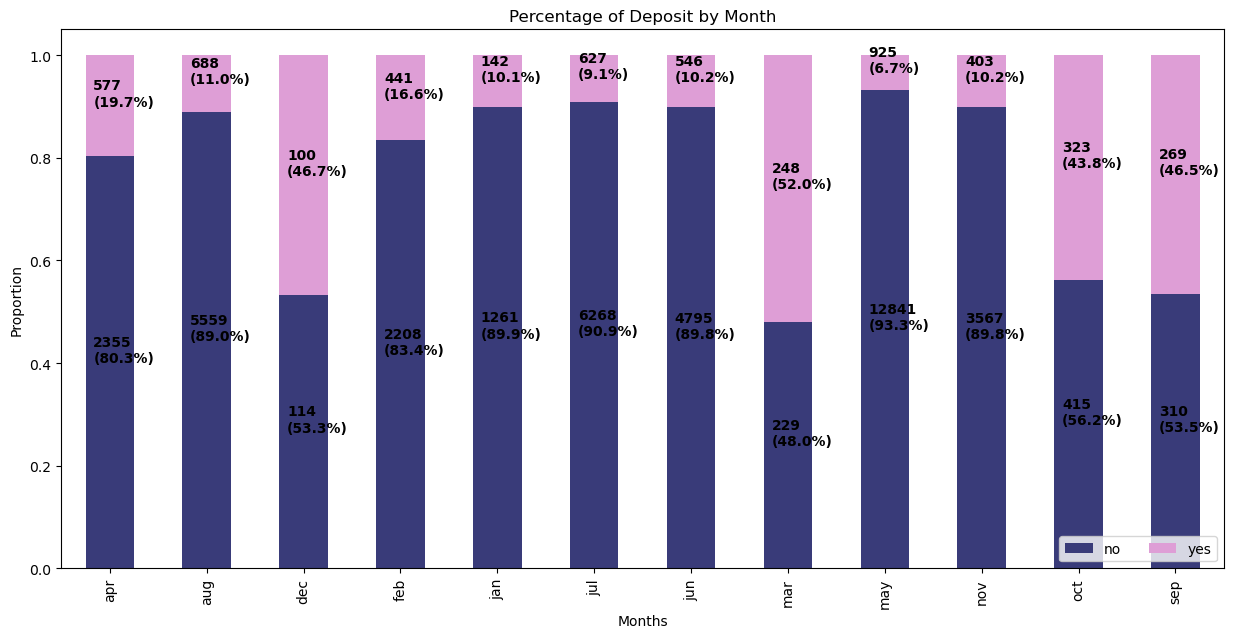

In [259]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Months")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Month')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- Extremely low deposit from customers in the month of May 6.7%
- Customers made high deposit in the month of March 52%

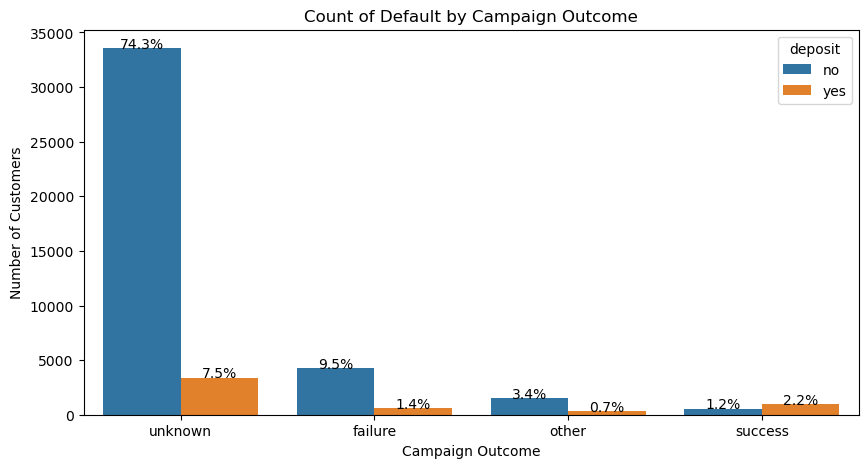

In [144]:

plt.figure(figsize=(10, 5))
ec = sns.countplot(x='poutcome', data=df, hue='deposit')
plt.xlabel('Campaign Outcome')
plt.ylabel('Number of Customers')
plt.title('Count of Default by Campaign Outcome')

for p in ec.patches:
    height = p.get_height()
    ec.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.1f}%'.format(100 * height/n),
            ha="center")

plt.show()

In [244]:
# Percentage of Deposit by Marketing Campaign Outcome per Customers
cross = pd.crosstab(index=df['poutcome'], columns=df['deposit'], normalize="index")
cross_job = pd.crosstab(index=df['poutcome'], columns=df['deposit'])
cross_job

deposit,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


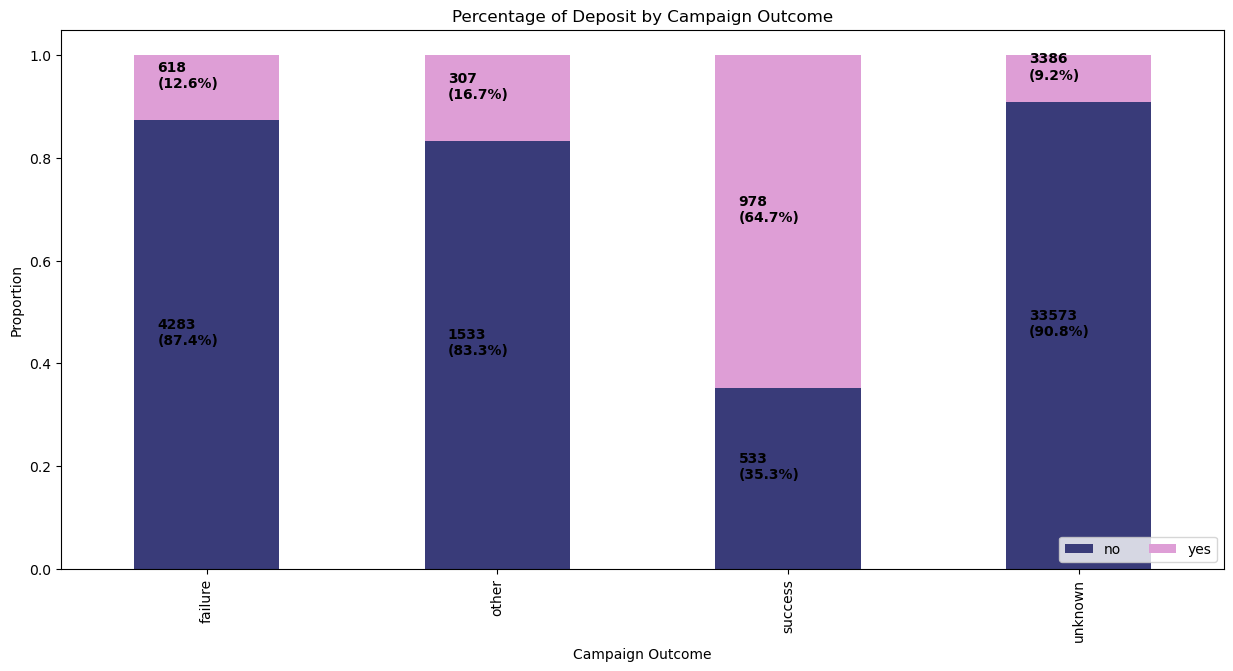

In [245]:
cross.plot(kind='bar', stacked=True, colormap='tab20b', figsize=(15, 7))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Campaign Outcome")
plt.ylabel("Proportion")
plt.title('Percentage of Deposit by Campaign Outcome')

for n, x in enumerate([*cross_job.index.values]):
    for (proportion, count, y_loc) in zip(cross.loc[x],
                                          cross_job.loc[x],
                                          cross.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

#### Observation
- High percentage of deposit from successful outcome 64.7%
- Least deposit from unknow 9.2%

#### Multivariate Analysis

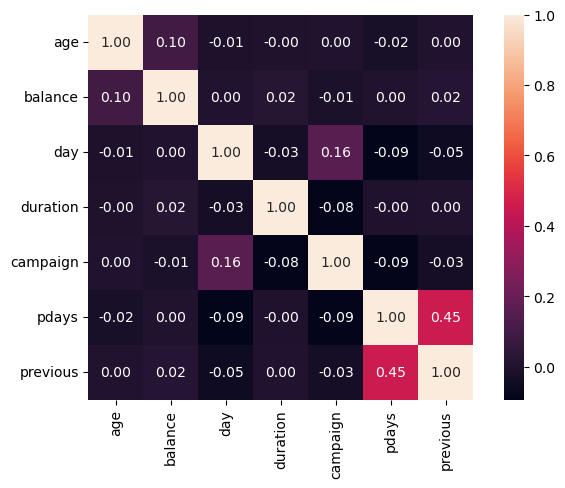

In [226]:
# Correlation between the target feature and other variables in the dataset
plt.figure(figsize=(8, 5))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

### In conclusion
- 1.8% of total customers defaulted their loans, 1.7% from customers without deposits
- 4.3% of 55.6% customers deposited for their Housing Loans
- 1.1% of 16% customers deposited for their Personal Loans
- The Successful Campaign outcome is 3.3% of total customers


#### Recommendation
- The bank should review the marketing campaign program
- The loan policy of the bank should be adjusted
- Customers without deposit should not be granted loan

In addition, the data is not balance therefore the monthly income of the customers and the type of account the customers are operating

 

In [ ]:
####

#### Data Pre-preprocessing

In [338]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,56-65 Old Adults
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,36-55 Adults
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,18-35 Youth
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,36-55 Adults
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,18-35 Youth


In [339]:
# Create a new data for the only features needed for machine learning
df1 = df[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome', 'deposit']]

In [340]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [341]:
#Change the categorical features to numerical(encoding)
#Label Encoding
encoder = LabelEncoder() # Method initialization

#Looping for columns except Survived
for c in  df1.columns[0:]:
    if(df1[c].dtype=='object'):
        df1[c] = encoder.fit_transform(df1[c])
    else:
        df1[c] = df1[c]
        
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [342]:
# Nomalize the data with outliers
scaler = MinMaxScaler()

df1['sc_balance'] = scaler.fit_transform(df1['balance'].values.reshape(-1, 1))
df1['sc_duration'] = scaler.fit_transform(df1['duration'].values.reshape(-1, 1))
df1['sc_campaign'] = scaler.fit_transform(df1['campaign'].values.reshape(-1, 1))
df1['sc_pdays'] = scaler.fit_transform(df1['pdays'].values.reshape(-1, 1))
df1['sc_previous'] = scaler.fit_transform(df1['previous'].values.reshape(-1, 1))

df1.drop(['balance', 'duration', 'campaign', 'pdays', 'previous'], axis=1, inplace=True)

df1.head(2)

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,deposit,sc_balance,sc_duration,sc_campaign,sc_pdays,sc_previous
0,58,4,1,2,0,1,0,2,5,8,3,0,0.092259,0.053070,0.0,0.0,0.0
1,44,9,2,1,0,1,0,2,5,8,3,0,0.073067,0.030704,0.0,0.0,0.0


#### Machine Learning

In [343]:
df2 = df1[['age','job','marital','education','default','housing','loan','contact','day','month','poutcome','sc_balance','sc_duration','sc_campaign','sc_pdays','sc_previous',]]
label = df1[['deposit']]

In [344]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size=0.2, random_state=42)

In [345]:
# Logistic Regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

ly_pred = lr.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8824505142098861
Precision: 0.6129032258064516
Recall: 0.06966086159486709
F1-score: 0.12510288065843622
AUC-ROC: 0.5318123221455221


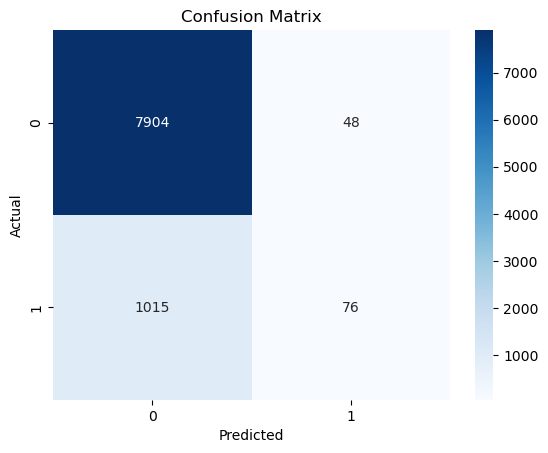

In [346]:
#Create a  confusion metrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [347]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.9002543403737697
Precision: 0.6317991631799164
Recall: 0.4152153987167736
F1-score: 0.5011061946902655
AUC-ROC: 0.6910081017728738


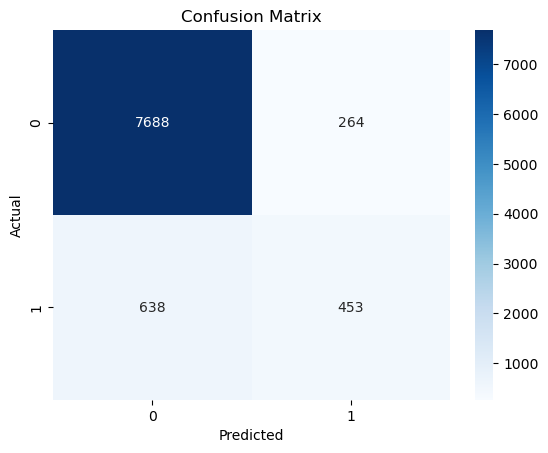

In [348]:
#Create a  confusion metrix
rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [349]:
#XGB Classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgy_pred = xgb.predict(X_test)

print('XGB Classifier')
print('Accuracy:', accuracy_score(y_test, xgy_pred))
print('Precision:', precision_score(y_test, xgy_pred))
print('Recall:', recall_score(y_test, xgy_pred))
print('F1-score:', f1_score(y_test, xgy_pred))
print('AUC-ROC:', roc_auc_score(y_test, xgy_pred))

XGB Classifier
Accuracy: 0.9077739688156585
Precision: 0.6576687116564417
Recall: 0.4912923923006416
F1-score: 0.5624344176285414
AUC-ROC: 0.7281034396110854


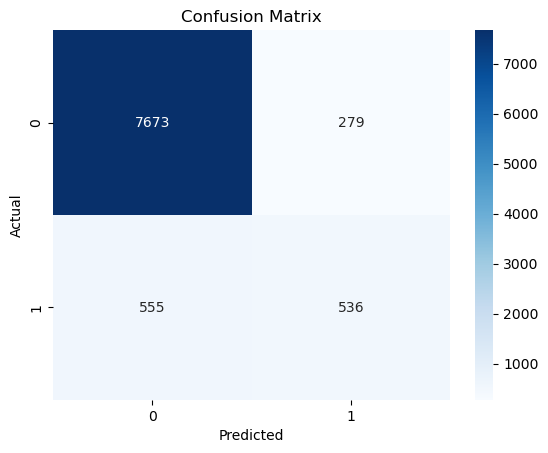

In [350]:
#Create a  confusion metrix
rcm = confusion_matrix(y_test, xgy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [351]:
#DecisionTree Classifier

dtb = DecisionTreeClassifier(random_state = 42)
dtb.fit(X_train, y_train)
dty_pred = dtb.predict(X_test)

print('DecisionTree Classifier')
print('Accuracy:', accuracy_score(y_test, dty_pred))
print('Precision:', precision_score(y_test, dty_pred))
print('Recall:', recall_score(y_test, dty_pred))
print('F1-score:', f1_score(y_test, dty_pred))
print('AUC-ROC:', roc_auc_score(y_test, dty_pred))

DecisionTree Classifier
Accuracy: 0.8752626340816101
Precision: 0.4831358249772106
Recall: 0.4857928505957837
F1-score: 0.4844606946983547
AUC-ROC: 0.7072450168471875


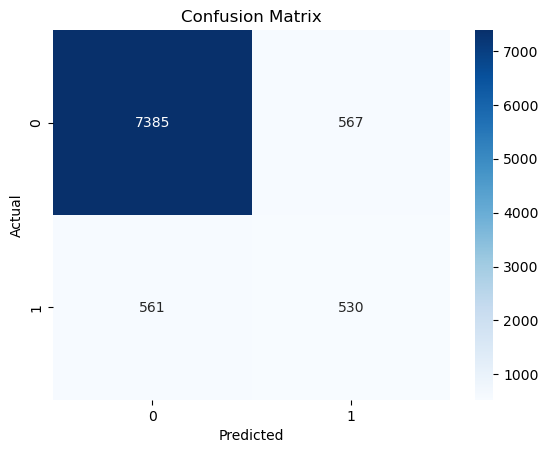

In [352]:
rcm = confusion_matrix(y_test, dty_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [353]:
#SGD Classifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgy_pred = sgd.predict(X_test)

print('SGD Classifier')
print('Accuracy:', accuracy_score(y_test, sgy_pred))
print('Precision:', precision_score(y_test, sgy_pred))
print('Recall:', recall_score(y_test, sgy_pred))
print('F1-score:', f1_score(y_test, sgy_pred))
print('AUC-ROC:', roc_auc_score(y_test, sgy_pred))

SGD Classifier
Accuracy: 0.8870949906004645
Precision: 0.624113475177305
Recall: 0.1613198900091659
F1-score: 0.2563729060451566
AUC-ROC: 0.5739949550649451


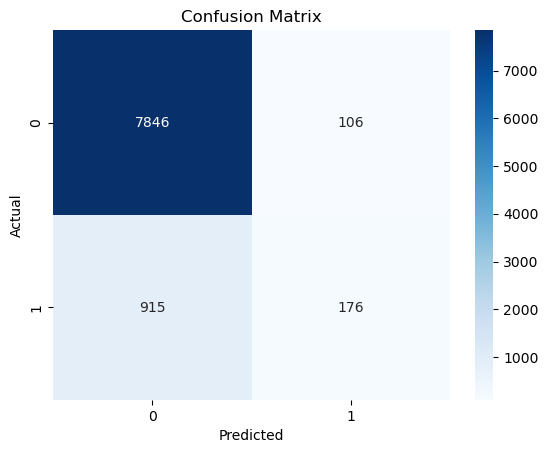

In [354]:
rcm = confusion_matrix(y_test, sgy_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [355]:
#K-Nearest

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)

print('K_Nearest')
print('Accuracy:', accuracy_score(y_test, kn_pred))
print('Precision:', precision_score(y_test, kn_pred))
print('Recall:', recall_score(y_test, kn_pred))
print('F1-score:', f1_score(y_test, kn_pred))
print('AUC-ROC:', roc_auc_score(y_test, kn_pred))

K_Nearest
Accuracy: 0.8760367134800399
Precision: 0.4525316455696203
Recall: 0.1310724106324473
F1-score: 0.20326936744847193
AUC-ROC: 0.554658438716626


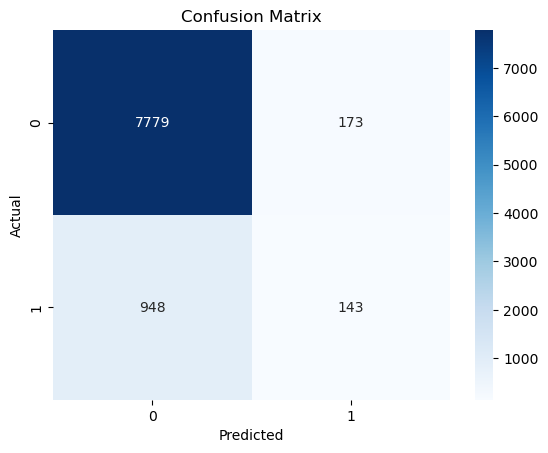

In [356]:
rcm = confusion_matrix(y_test, kn_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [357]:
#SVC

sv = SVC()
sv.fit(X_train, y_train)
sv_pred = sv.predict(X_test)

print('SVC')
print('Accuracy:', accuracy_score(y_test, sv_pred))
print('Precision:', precision_score(y_test, sv_pred))
print('Recall:', recall_score(y_test, sv_pred))
print('F1-score:', f1_score(y_test, sv_pred))
print('AUC-ROC:', roc_auc_score(y_test, sv_pred))

SVC
Accuracy: 0.8793541966161672
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


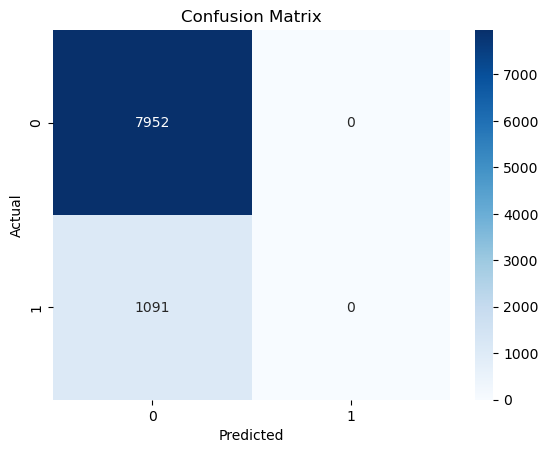

In [358]:
rcm = confusion_matrix(y_test, sv_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [359]:
nv = GaussianNB()
nv.fit(X_train, y_train)
nv_pred = nv.predict(X_test)

print('Naive')
print('Accuracy:', accuracy_score(y_test, nv_pred))
print('Precision:', precision_score(y_test, nv_pred))
print('Recall:', recall_score(y_test, nv_pred))
print('F1-score:', f1_score(y_test, nv_pred))
print('AUC-ROC:', roc_auc_score(y_test, nv_pred))

Naive
Accuracy: 0.8248368904124738
Precision: 0.3426930440331844
Recall: 0.4922089825847846
F1-score: 0.4040632054176072
AUC-ROC: 0.6813409098034588


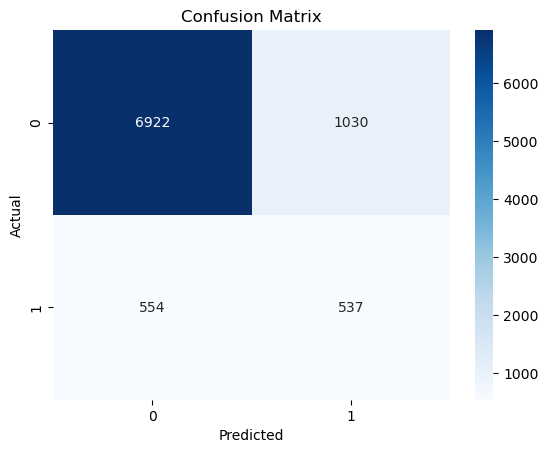

In [294]:
rcm = confusion_matrix(y_test, nv_pred)

#Visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [297]:
# 8 Machine Learning Algorithms that  will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classififier'], [RandomForestClassifier(), 'Random Forest'], [KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(), 'SGD Classifier'], [SVC(), 'SVC'], [GaussianNB(), 'Naive Bayes'], [DecisionTreeClassifier(random_state = 42), 'Decision Tree'], [LogisticRegression(), 'Logistic Regression']]

In [298]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
#con_mat = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [299]:
acc_list

{'XGB Classififier': ['90.78%'],
 'Random Forest': ['90.12%'],
 'K-Nearest Neighbours': ['87.6%'],
 'SGD Classifier': ['88.05%'],
 'SVC': ['87.94%'],
 'Naive Bayes': ['82.48%'],
 'Decision Tree': ['87.53%'],
 'Logistic Regression': ['88.25%']}

In [307]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classififier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,90.78%,90.12%,87.6%,88.05%,87.94%,82.48%,87.53%,88.25%


In [337]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classififier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,65.77%,63.98%,45.25%,72.73%,0.0%,34.27%,48.31%,61.29%


In [309]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classififier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,49.13%,41.52%,13.11%,1.47%,0.0%,49.22%,48.58%,6.97%


In [310]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classififier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,72.81%,69.16%,55.47%,50.7%,50.0%,68.13%,70.72%,53.18%



The best model for this predictive analysis is SGD classifier, it has the greater percentage of precision 72.7%, the accuracy is low compare to XGB, RandomForest and LogisticRegression. In this scenario, we have to focus on reducing the false positive, incase of customer predicts to deposit for the loan does not eventually deposit.   